##### Copyright 2019 The TensorFlow Hub Authors.

Licensed under the Apache License, Version 2.0 (the "License");

In [1]:
# Copyright 2019 The TensorFlow Hub Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# 영화 리뷰로 텍스트 분류

<table class="tfo-notebook-buttons" align="left">
  <td><a target="_blank" href="https://www.tensorflow.org/hub/tutorials/tf2_text_classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png">TensorFlow.org에서 보기</a></td>
  <td><a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/ko/hub/tutorials/tf2_text_classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png">Google Colab에서 실행</a></td>
  <td><a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/ko/hub/tutorials/tf2_text_classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png">GitHub에서 소스 보기</a></td>
  <td><a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/ko/hub/tutorials/tf2_text_classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png">노트북 다운로드</a></td>
  <td><a href="https://tfhub.dev/google/collections/nnlm/1"><img src="https://www.tensorflow.org/images/hub_logo_32px.png">TF Hub 모델 보기</a></td>
</table>

이 노트북은 리뷰의 텍스트를 사용하여 영화 리뷰를 *긍정적* 또는 *부정적*으로 분류합니다. *이진(* 또는 2-클래스 분류인 이 예는 광범위하게 적용할 수 있는 중요한 머신러닝 응용 사례입니다.

[인터넷 영화 데이터베이스](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb)에서 가져온 50,000개의 영화 리뷰 텍스트를 포함한 [IMDB 데이터세트](https://www.imdb.com/)를 사용합니다. 이 데이터세트는 훈련을 위한 25,000개 리뷰와 테스트를 위한 25,000개 리뷰로 나뉩니다. 훈련 및 테스트 세트는 *균형적*으로, 긍정적 리뷰와 부정적 리뷰의 수가 동일하게 포함되어 있습니다.

이 노트북은 높은 수준의 API인 [tf.keras](https://www.tensorflow.org/api_docs/python/tf/keras)를 사용하여 TensorFlow에서 모델을 빌드 및 훈련하고, 전이 학습을 위한 라이브러리 및 플랫폼인 [TensorFlow Hub](https://www.tensorflow.org/hub)를 사용합니다. `tf.keras`를 사용하는 한 단계 더 나아간 텍스트 분류 튜토리얼은 [MLCC 텍스트 분류 가이드](https://developers.google.com/machine-learning/guides/text-classification/)를 참조하세요.

### 더 많은 모델

[여기](https://tfhub.dev/s?module-type=text-embedding)에서 텍스트 임베딩을 생성하는 데 사용할 수 있는 보다 표현력이 있거나 성능이 뛰어난 모델을 찾을 수 있습니다.

## !pip install -U tf-hub-nightly<br>import tensorflow_hub as hub<br><br>from tensorflow.keras import layers

In [3]:
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

2022-12-14 22:09:32.730423: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-14 22:09:32.730516: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-12-14 22:09:32.730526: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


Version:  2.11.0
Eager mode:  True
Hub version:  0.12.0
GPU is available


## IMDb 데이터세트 다운로드하기

IMDB 데이터세트는 [TensorFlow 데이터세트](https://github.com/tensorflow/datasets)에서 사용할 수 있습니다. 다음 코드를 이용해 IMDB 데이터세트를 사용자 머신(또는 colab 런타임)으로 다운로드합니다.

In [4]:
train_data, test_data = tfds.load(name="imdb_reviews", split=["train", "test"], 
                                  batch_size=-1, as_supervised=True)

train_examples, train_labels = tfds.as_numpy(train_data)
test_examples, test_labels = tfds.as_numpy(test_data)

## 데이터 살펴보기

잠시 시간을내어 데이터 형식을 이해하겠습니다. 각 예제는 영화 리뷰와 해당 레이블을 나타내는 문장입니다. 문장은 어떤 식 으로든 사전 처리되지 않습니다. 레이블은 0 또는 1의 정수 값입니다. 여기서 0은 부정적인 리뷰이고 1은 긍정적 인 리뷰입니다.

In [5]:
print("Training entries: {}, test entries: {}".format(len(train_examples), len(test_examples)))

Training entries: 25000, test entries: 25000


처음 10개의 예를 인쇄하겠습니다.

In [6]:
train_examples[:10]

array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot 

처음 10개의 레이블도 인쇄하겠습니다.

In [7]:
train_labels[:10]

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0])

## 모델 구성하기

신경망은 레이어를 쌓아서 생성됩니다. 이를 위해서는 세 가지 주요 아키텍처 결정이 필요합니다.

- 텍스트를 표현하는 방법?
- 모델에서 사용할 레이어는 몇 개입니까?
- 각 레이어에 사용할 *숨겨진 단위*는 몇 개입니까?

이 예에서 입력 데이터는 문장으로 구성됩니다. 예측할 레이블은 0 또는 1입니다.

텍스트를 표현하는 한 가지 방법은 문장을 임베딩 벡터로 변환하는 것입니다. 사전 훈련 된 텍스트 임베딩을 첫 번째 레이어로 사용할 수 있으며, 두 가지 이점이 있습니다.

- 텍스트 전처리에 대해 걱정할 필요가 없습니다.
- 전이 학습의 혜택을 누릴 수 있습니다.

이 예에서는 [google/nnlm-en-dim50/2](https://www.tensorflow.org/hub)라고 하는 [TensorFlow Hub](https://tfhub.dev/google/nnlm-en-dim50/2)의 모델을 사용합니다.

이 튜토리얼을 위해 테스트할 다른 두 가지 모델이 있습니다.

- [google/nnlm-en-dim50-with-normalization/2](https://tfhub.dev/google/nnlm-en-dim50-with-normalization/2) - [google/nnlm-en-dim50/2](https://tfhub.dev/google/nnlm-en-dim50/2)와 동일하지만 구두점을 제거하기 위한 추가 텍스트 정규화가 있습니다. 이는 입력 텍스트의 토큰에 대한 어휘 내 임베딩을 더 잘 적용하는 데 도움이 될 수 있습니다.
- [google/nnlm-en-dim128-with-normalization/2](https://tfhub.dev/google/nnlm-en-dim128-with-normalization/2) - 임베딩 치수가 50이 아닌 128의 더 큰 모델입니다.

먼저 TensorFlow Hub 모델을 사용하여 문장을 포함하는 Keras 레이어를 만들고 몇 가지 입력 예에서 사용해 보겠습니다. 생성된 임베딩의 출력 형상은 `(num_examples, embedding_dimension)`으로 예상됩니다.

In [8]:
model = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)
hub_layer(train_examples[:3])

<tf.Tensor: shape=(3, 50), dtype=float32, numpy=
array([[ 0.5423194 , -0.01190171,  0.06337537,  0.0686297 , -0.16776839,
        -0.10581177,  0.168653  , -0.04998823, -0.31148052,  0.07910344,
         0.15442258,  0.01488661,  0.03930155,  0.19772716, -0.12215477,
        -0.04120982, -0.27041087, -0.21922147,  0.26517656, -0.80739075,
         0.25833526, -0.31004202,  0.2868321 ,  0.19433866, -0.29036498,
         0.0386285 , -0.78444123, -0.04793238,  0.41102988, -0.36388886,
        -0.58034706,  0.30269453,  0.36308962, -0.15227163, -0.4439151 ,
         0.19462997,  0.19528405,  0.05666233,  0.2890704 , -0.28468323,
        -0.00531206,  0.0571938 , -0.3201319 , -0.04418665, -0.08550781,
        -0.55847436, -0.2333639 , -0.20782956, -0.03543065, -0.17533456],
       [ 0.56338924, -0.12339553, -0.10862677,  0.7753425 , -0.07667087,
        -0.15752274,  0.01872334, -0.08169781, -0.3521876 ,  0.46373403,
        -0.08492758,  0.07166861, -0.00670818,  0.12686071, -0.19326551,
 

이제 전체 모델을 빌드 해 보겠습니다.

In [9]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 keras_layer (KerasLayer)    (None, 50)                48190600  


 dense (Dense)               (None, 16)                816       


 dense_1 (Dense)             (None, 1)                 17        


Total params: 48,191,433


Trainable params: 48,191,433


Non-trainable params: 0


_________________________________________________________________


순서대로 층을 쌓아 분류기를 만듭니다:

1. 첫 번째 레이어는 TensorFlow Hub 레이어입니다. 이 레이어는 사전 훈련된 저장된 모델을 사용하여 문장을 임베딩 벡터에 매핑합니다. 여기서 사용하는 모델([google/nnlm-en-dim50/2](https://tfhub.dev/google/nnlm-en-dim50/2))은 문장을 여러 토큰으로 분할하고 각 토큰을 포함한 다음 임베딩을 결합합니다. 결과적인 차원은 `(num_examples, embedding_dimension)`입니다.
2. 이 고정 길이 출력 벡터는 16 개의 은닉 유닛이있는 완전 연결 ( `Dense` ) 계층을 통해 파이프됩니다.
3. 마지막 레이어는 단일 출력 노드와 조밀하게 연결됩니다. 여기서 모델에 따라 실제 클래스의 로그 확률인 로짓이 출력됩니다.

### 숨겨진 단위

위의 모델에는 입력과 출력 사이에 두 개의 중간 또는 "숨겨진" 레이어가 있습니다. 출력(단위, 노드 또는 뉴런)의 수는 레이어에 대한 표현 공간의 차원입니다. 즉, 내부 표현을 학습할 때 네트워크에서 허용되는 자유의 정도입니다.

모델에 더 많은 숨겨진 단위(고차원 표현 공간) 및/또는 더 많은 레이어가 있는 경우, 네트워크는 더 복잡한 표현을 학습할 수 있습니다. 그러나 이로 인해 계산 측면에서 네트워크의 비용 부담이 증가하고, 원치 않는 패턴(훈련 데이터에서는 성능을 향상하지만 테스트 데이터에서는 그렇지 않은 패턴)을 학습하게 됩니다. 이를 *과대적합*이라고 하며 나중에 살펴보겠습니다.

### 손실 기능 및 옵티마이저

모델에는 훈련을 위한 손실 함수와 옵티마이저가 필요합니다. 이진 분류 문제이고 모델이 확률(시그모이드 활성화가 있는 단일 단위 레이어)을 출력하므로 `binary_crossentropy` 손실 함수를 사용합니다.

손실 함수에 이 선택만 가능한 것은 아닙니다. 예를 들어 `mean_squared_error`를 선택할 수 있습니다. 그러나 일반적으로 `binary_crossentropy`가 확률을 처리하기에는 더 적합합니다. 즉, 확률 분포 간 또는 이 경우에는 실제 분포와 예측 간의 "거리"를 측정합니다.

나중에 회귀 문제 (예 : 주택 가격 예측)를 탐색 할 때 평균 제곱 오차라고하는 또 다른 손실 함수를 사용하는 방법을 살펴볼 것입니다.

이제 최적화 기와 손실 함수를 사용하도록 모델을 구성합니다.

In [10]:
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

## 검증 세트 만들기

훈련할 때 이전에 입력된 적이 없는 데이터에 대한 모델의 정확성을 확인하려고 합니다. 원본 훈련 데이터에서 10,000개의 예제를 구분하여 *검증 세트*를 만듭니다. 왜 지금 테스트 세트를 사용하지 않을까요? 훈련 데이터만 사용하여 모델을 개발하고 조정한 다음 테스트 데이터를 한 번만 사용하여 정확성을 평가하는 것이 목적이기 때문입니다.

In [11]:
x_val = train_examples[:10000]
partial_x_train = train_examples[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

## 모델 훈련하기

512개 샘플의 미니 배치에서 40개 epoch 동안 모델을 훈련합니다. 이 동작은 `x_train` 및 `y_train` 텐서의 모든 샘플에 대한 40회 반복에 해당합니다. 훈련하는 동안 검증 세트의 10,000개 샘플에서 모델의 손실과 정확도를 모니터링합니다.

In [12]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/40


 1/30 [>.............................] - ETA: 47s - loss: 0.7751 - accuracy: 0.5059

 2/30 [=>............................] - ETA: 5s - loss: 0.7646 - accuracy: 0.5078 

 3/30 [==>...........................] - ETA: 4s - loss: 0.7555 - accuracy: 0.5098

 4/30 [===>..........................] - ETA: 4s - loss: 0.7481 - accuracy: 0.5098

 5/30 [====>.........................] - ETA: 4s - loss: 0.7435 - accuracy: 0.5027

 6/30 [=====>........................] - ETA: 4s - loss: 0.7364 - accuracy: 0.5010

 7/30 [======>.......................] - ETA: 4s - loss: 0.7307 - accuracy: 0.5028

 8/30 [=======>......................] - ETA: 3s - loss: 0.7264 - accuracy: 0.5044

 9/30 [========>.....................] - ETA: 3s - loss: 0.7218 - accuracy: 0.5109

10/30 [=========>....................] - ETA: 3s - loss: 0.7181 - accuracy: 0.5178

11/30 [==========>...................] - ETA: 3s - loss: 0.7148 - accuracy: 0.5231

12/30 [===========>..................] - ETA: 3s - loss: 0.7124 - accuracy: 0.5231

13/30 [============>.................] - ETA: 3s - loss: 0.7102 - accuracy: 0.5261

14/30 [=============>................] - ETA: 2s - loss: 0.7082 - accuracy: 0.5289

15/30 [==============>...............] - ETA: 2s - loss: 0.7062 - accuracy: 0.5337

16/30 [===============>..............] - ETA: 2s - loss: 0.7043 - accuracy: 0.5377

17/30 [================>.............] - ETA: 2s - loss: 0.7025 - accuracy: 0.5402

18/30 [=================>............] - ETA: 2s - loss: 0.7013 - accuracy: 0.5418

19/30 [==================>...........] - ETA: 1s - loss: 0.6998 - accuracy: 0.5433

20/30 [===================>..........] - ETA: 1s - loss: 0.6984 - accuracy: 0.5454

21/30 [====================>.........] - ETA: 1s - loss: 0.6965 - accuracy: 0.5496

22/30 [=====================>........] - ETA: 1s - loss: 0.6950 - accuracy: 0.5536

23/30 [======================>.......] - ETA: 1s - loss: 0.6931 - accuracy: 0.5590

24/30 [=======================>......] - ETA: 1s - loss: 0.6915 - accuracy: 0.5646

25/30 [========================>.....] - ETA: 0s - loss: 0.6903 - accuracy: 0.5677

26/30 [=========================>....] - ETA: 0s - loss: 0.6895 - accuracy: 0.5693

27/30 [==========================>...] - ETA: 0s - loss: 0.6884 - accuracy: 0.5720

28/30 [===========================>..] - ETA: 0s - loss: 0.6872 - accuracy: 0.5765

29/30 [============================>.] - ETA: 0s - loss: 0.6856 - accuracy: 0.5818

30/30 [==============================] - ETA: 0s - loss: 0.6851 - accuracy: 0.5831

30/30 [==============================] - 7s 195ms/step - loss: 0.6851 - accuracy: 0.5831 - val_loss: 0.6416 - val_accuracy: 0.6903


Epoch 2/40


 1/30 [>.............................] - ETA: 4s - loss: 0.6295 - accuracy: 0.7402

 2/30 [=>............................] - ETA: 4s - loss: 0.6351 - accuracy: 0.7188

 3/30 [==>...........................] - ETA: 4s - loss: 0.6336 - accuracy: 0.7031

 4/30 [===>..........................] - ETA: 4s - loss: 0.6308 - accuracy: 0.7153

 5/30 [====>.........................] - ETA: 4s - loss: 0.6301 - accuracy: 0.7156

 6/30 [=====>........................] - ETA: 4s - loss: 0.6271 - accuracy: 0.7249

 7/30 [======>.......................] - ETA: 4s - loss: 0.6252 - accuracy: 0.7243

 8/30 [=======>......................] - ETA: 3s - loss: 0.6236 - accuracy: 0.7271

 9/30 [========>.....................] - ETA: 3s - loss: 0.6226 - accuracy: 0.7276

10/30 [=========>....................] - ETA: 3s - loss: 0.6214 - accuracy: 0.7291

11/30 [==========>...................] - ETA: 3s - loss: 0.6193 - accuracy: 0.7321

12/30 [===========>..................] - ETA: 3s - loss: 0.6180 - accuracy: 0.7318

13/30 [============>.................] - ETA: 3s - loss: 0.6164 - accuracy: 0.7336

14/30 [=============>................] - ETA: 2s - loss: 0.6157 - accuracy: 0.7337

15/30 [==============>...............] - ETA: 2s - loss: 0.6139 - accuracy: 0.7366

16/30 [===============>..............] - ETA: 2s - loss: 0.6127 - accuracy: 0.7373

17/30 [================>.............] - ETA: 2s - loss: 0.6106 - accuracy: 0.7394

18/30 [=================>............] - ETA: 2s - loss: 0.6086 - accuracy: 0.7418

19/30 [==================>...........] - ETA: 1s - loss: 0.6073 - accuracy: 0.7430

20/30 [===================>..........] - ETA: 1s - loss: 0.6051 - accuracy: 0.7458

21/30 [====================>.........] - ETA: 1s - loss: 0.6031 - accuracy: 0.7478

22/30 [=====================>........] - ETA: 1s - loss: 0.6007 - accuracy: 0.7508

23/30 [======================>.......] - ETA: 1s - loss: 0.5992 - accuracy: 0.7515

24/30 [=======================>......] - ETA: 1s - loss: 0.5979 - accuracy: 0.7516

25/30 [========================>.....] - ETA: 0s - loss: 0.5965 - accuracy: 0.7532

26/30 [=========================>....] - ETA: 0s - loss: 0.5949 - accuracy: 0.7535

27/30 [==========================>...] - ETA: 0s - loss: 0.5927 - accuracy: 0.7542

28/30 [===========================>..] - ETA: 0s - loss: 0.5907 - accuracy: 0.7561

29/30 [============================>.] - ETA: 0s - loss: 0.5888 - accuracy: 0.7574

30/30 [==============================] - ETA: 0s - loss: 0.5879 - accuracy: 0.7583

30/30 [==============================] - 6s 187ms/step - loss: 0.5879 - accuracy: 0.7583 - val_loss: 0.5429 - val_accuracy: 0.7756


Epoch 3/40


 1/30 [>.............................] - ETA: 5s - loss: 0.5193 - accuracy: 0.7988

 2/30 [=>............................] - ETA: 5s - loss: 0.5108 - accuracy: 0.8096

 3/30 [==>...........................] - ETA: 4s - loss: 0.5136 - accuracy: 0.8118

 4/30 [===>..........................] - ETA: 4s - loss: 0.5081 - accuracy: 0.8223

 5/30 [====>.........................] - ETA: 4s - loss: 0.5066 - accuracy: 0.8238

 6/30 [=====>........................] - ETA: 4s - loss: 0.5016 - accuracy: 0.8265

 7/30 [======>.......................] - ETA: 4s - loss: 0.5019 - accuracy: 0.8242

 8/30 [=======>......................] - ETA: 4s - loss: 0.5003 - accuracy: 0.8228

 9/30 [========>.....................] - ETA: 3s - loss: 0.4970 - accuracy: 0.8262

10/30 [=========>....................] - ETA: 3s - loss: 0.4956 - accuracy: 0.8256

11/30 [==========>...................] - ETA: 3s - loss: 0.4922 - accuracy: 0.8271

12/30 [===========>..................] - ETA: 3s - loss: 0.4903 - accuracy: 0.8267

13/30 [============>.................] - ETA: 3s - loss: 0.4887 - accuracy: 0.8266

14/30 [=============>................] - ETA: 2s - loss: 0.4871 - accuracy: 0.8273

15/30 [==============>...............] - ETA: 2s - loss: 0.4842 - accuracy: 0.8290

16/30 [===============>..............] - ETA: 2s - loss: 0.4808 - accuracy: 0.8323

17/30 [================>.............] - ETA: 2s - loss: 0.4792 - accuracy: 0.8328

18/30 [=================>............] - ETA: 2s - loss: 0.4770 - accuracy: 0.8329

19/30 [==================>...........] - ETA: 1s - loss: 0.4737 - accuracy: 0.8344

20/30 [===================>..........] - ETA: 1s - loss: 0.4721 - accuracy: 0.8344

21/30 [====================>.........] - ETA: 1s - loss: 0.4696 - accuracy: 0.8358

22/30 [=====================>........] - ETA: 1s - loss: 0.4673 - accuracy: 0.8366

23/30 [======================>.......] - ETA: 1s - loss: 0.4657 - accuracy: 0.8369

24/30 [=======================>......] - ETA: 1s - loss: 0.4628 - accuracy: 0.8384

25/30 [========================>.....] - ETA: 0s - loss: 0.4608 - accuracy: 0.8389

26/30 [=========================>....] - ETA: 0s - loss: 0.4585 - accuracy: 0.8398

27/30 [==========================>...] - ETA: 0s - loss: 0.4559 - accuracy: 0.8406

28/30 [===========================>..] - ETA: 0s - loss: 0.4539 - accuracy: 0.8417

29/30 [============================>.] - ETA: 0s - loss: 0.4525 - accuracy: 0.8418

30/30 [==============================] - ETA: 0s - loss: 0.4523 - accuracy: 0.8415

30/30 [==============================] - 6s 190ms/step - loss: 0.4523 - accuracy: 0.8415 - val_loss: 0.4290 - val_accuracy: 0.8269


Epoch 4/40


 1/30 [>.............................] - ETA: 5s - loss: 0.3759 - accuracy: 0.8770

 2/30 [=>............................] - ETA: 5s - loss: 0.3739 - accuracy: 0.8711

 3/30 [==>...........................] - ETA: 5s - loss: 0.3654 - accuracy: 0.8763

 4/30 [===>..........................] - ETA: 4s - loss: 0.3621 - accuracy: 0.8799

 5/30 [====>.........................] - ETA: 4s - loss: 0.3563 - accuracy: 0.8852

 6/30 [=====>........................] - ETA: 4s - loss: 0.3560 - accuracy: 0.8844

 7/30 [======>.......................] - ETA: 4s - loss: 0.3550 - accuracy: 0.8820

 8/30 [=======>......................] - ETA: 3s - loss: 0.3533 - accuracy: 0.8831

 9/30 [========>.....................] - ETA: 3s - loss: 0.3532 - accuracy: 0.8815

11/30 [==========>...................] - ETA: 3s - loss: 0.3492 - accuracy: 0.8817

12/30 [===========>..................] - ETA: 2s - loss: 0.3475 - accuracy: 0.8825

13/30 [============>.................] - ETA: 2s - loss: 0.3460 - accuracy: 0.8834

14/30 [=============>................] - ETA: 2s - loss: 0.3443 - accuracy: 0.8835

15/30 [==============>...............] - ETA: 2s - loss: 0.3431 - accuracy: 0.8842

16/30 [===============>..............] - ETA: 2s - loss: 0.3402 - accuracy: 0.8866

17/30 [================>.............] - ETA: 2s - loss: 0.3379 - accuracy: 0.8882

18/30 [=================>............] - ETA: 2s - loss: 0.3369 - accuracy: 0.8880

19/30 [==================>...........] - ETA: 1s - loss: 0.3354 - accuracy: 0.8882

20/30 [===================>..........] - ETA: 1s - loss: 0.3354 - accuracy: 0.8874

21/30 [====================>.........] - ETA: 1s - loss: 0.3341 - accuracy: 0.8880

22/30 [=====================>........] - ETA: 1s - loss: 0.3320 - accuracy: 0.8893

24/30 [=======================>......] - ETA: 0s - loss: 0.3287 - accuracy: 0.8908

25/30 [========================>.....] - ETA: 0s - loss: 0.3272 - accuracy: 0.8906

26/30 [=========================>....] - ETA: 0s - loss: 0.3255 - accuracy: 0.8912

27/30 [==========================>...] - ETA: 0s - loss: 0.3245 - accuracy: 0.8916

28/30 [===========================>..] - ETA: 0s - loss: 0.3243 - accuracy: 0.8915

29/30 [============================>.] - ETA: 0s - loss: 0.3236 - accuracy: 0.8913

30/30 [==============================] - ETA: 0s - loss: 0.3232 - accuracy: 0.8915

30/30 [==============================] - 5s 178ms/step - loss: 0.3232 - accuracy: 0.8915 - val_loss: 0.3586 - val_accuracy: 0.8528


Epoch 5/40


 1/30 [>.............................] - ETA: 5s - loss: 0.2389 - accuracy: 0.9297

 2/30 [=>............................] - ETA: 4s - loss: 0.2446 - accuracy: 0.9297

 3/30 [==>...........................] - ETA: 4s - loss: 0.2471 - accuracy: 0.9277

 4/30 [===>..........................] - ETA: 4s - loss: 0.2459 - accuracy: 0.9277

 5/30 [====>.........................] - ETA: 4s - loss: 0.2478 - accuracy: 0.9277

 6/30 [=====>........................] - ETA: 4s - loss: 0.2528 - accuracy: 0.9232

 8/30 [=======>......................] - ETA: 3s - loss: 0.2512 - accuracy: 0.9224

 9/30 [========>.....................] - ETA: 3s - loss: 0.2507 - accuracy: 0.9217

10/30 [=========>....................] - ETA: 3s - loss: 0.2482 - accuracy: 0.9227

12/30 [===========>..................] - ETA: 2s - loss: 0.2474 - accuracy: 0.9217

13/30 [============>.................] - ETA: 2s - loss: 0.2463 - accuracy: 0.9217

14/30 [=============>................] - ETA: 2s - loss: 0.2458 - accuracy: 0.9216

16/30 [===============>..............] - ETA: 2s - loss: 0.2428 - accuracy: 0.9237

17/30 [================>.............] - ETA: 2s - loss: 0.2410 - accuracy: 0.9246

18/30 [=================>............] - ETA: 1s - loss: 0.2398 - accuracy: 0.9248

21/30 [====================>.........] - ETA: 1s - loss: 0.2386 - accuracy: 0.9233

22/30 [=====================>........] - ETA: 1s - loss: 0.2369 - accuracy: 0.9239

23/30 [======================>.......] - ETA: 1s - loss: 0.2355 - accuracy: 0.9243

24/30 [=======================>......] - ETA: 0s - loss: 0.2350 - accuracy: 0.9240

26/30 [=========================>....] - ETA: 0s - loss: 0.2337 - accuracy: 0.9247

28/30 [===========================>..] - ETA: 0s - loss: 0.2329 - accuracy: 0.9247

29/30 [============================>.] - ETA: 0s - loss: 0.2320 - accuracy: 0.9248

30/30 [==============================] - ETA: 0s - loss: 0.2318 - accuracy: 0.9249

30/30 [==============================] - 5s 156ms/step - loss: 0.2318 - accuracy: 0.9249 - val_loss: 0.3204 - val_accuracy: 0.8642


Epoch 6/40


 1/30 [>.............................] - ETA: 5s - loss: 0.1756 - accuracy: 0.9531

 2/30 [=>............................] - ETA: 5s - loss: 0.1757 - accuracy: 0.9541

 3/30 [==>...........................] - ETA: 4s - loss: 0.1774 - accuracy: 0.9486

 4/30 [===>..........................] - ETA: 4s - loss: 0.1808 - accuracy: 0.9473

 5/30 [====>.........................] - ETA: 4s - loss: 0.1810 - accuracy: 0.9469

 6/30 [=====>........................] - ETA: 4s - loss: 0.1823 - accuracy: 0.9443

 7/30 [======>.......................] - ETA: 4s - loss: 0.1774 - accuracy: 0.9467

 8/30 [=======>......................] - ETA: 3s - loss: 0.1793 - accuracy: 0.9446

 9/30 [========>.....................] - ETA: 3s - loss: 0.1791 - accuracy: 0.9444

10/30 [=========>....................] - ETA: 3s - loss: 0.1768 - accuracy: 0.9459

12/30 [===========>..................] - ETA: 2s - loss: 0.1760 - accuracy: 0.9456

13/30 [============>.................] - ETA: 2s - loss: 0.1755 - accuracy: 0.9470

14/30 [=============>................] - ETA: 2s - loss: 0.1744 - accuracy: 0.9470

15/30 [==============>...............] - ETA: 2s - loss: 0.1739 - accuracy: 0.9473

16/30 [===============>..............] - ETA: 2s - loss: 0.1740 - accuracy: 0.9474

18/30 [=================>............] - ETA: 1s - loss: 0.1717 - accuracy: 0.9480

20/30 [===================>..........] - ETA: 1s - loss: 0.1704 - accuracy: 0.9487

21/30 [====================>.........] - ETA: 1s - loss: 0.1708 - accuracy: 0.9487

22/30 [=====================>........] - ETA: 1s - loss: 0.1715 - accuracy: 0.9482

23/30 [======================>.......] - ETA: 1s - loss: 0.1716 - accuracy: 0.9479

25/30 [========================>.....] - ETA: 0s - loss: 0.1706 - accuracy: 0.9478

26/30 [=========================>....] - ETA: 0s - loss: 0.1695 - accuracy: 0.9482

27/30 [==========================>...] - ETA: 0s - loss: 0.1691 - accuracy: 0.9485

29/30 [============================>.] - ETA: 0s - loss: 0.1691 - accuracy: 0.9481

30/30 [==============================] - ETA: 0s - loss: 0.1692 - accuracy: 0.9480

30/30 [==============================] - 5s 159ms/step - loss: 0.1692 - accuracy: 0.9480 - val_loss: 0.3067 - val_accuracy: 0.8722


Epoch 7/40


 1/30 [>.............................] - ETA: 5s - loss: 0.1378 - accuracy: 0.9668

 3/30 [==>...........................] - ETA: 2s - loss: 0.1294 - accuracy: 0.9661

 4/30 [===>..........................] - ETA: 3s - loss: 0.1329 - accuracy: 0.9653

 5/30 [====>.........................] - ETA: 3s - loss: 0.1306 - accuracy: 0.9656

 7/30 [======>.......................] - ETA: 2s - loss: 0.1294 - accuracy: 0.9674

 8/30 [=======>......................] - ETA: 2s - loss: 0.1296 - accuracy: 0.9666

 9/30 [========>.....................] - ETA: 2s - loss: 0.1287 - accuracy: 0.9657

11/30 [==========>...................] - ETA: 2s - loss: 0.1275 - accuracy: 0.9670

12/30 [===========>..................] - ETA: 2s - loss: 0.1271 - accuracy: 0.9668

14/30 [=============>................] - ETA: 2s - loss: 0.1283 - accuracy: 0.9661

16/30 [===============>..............] - ETA: 1s - loss: 0.1263 - accuracy: 0.9672

17/30 [================>.............] - ETA: 1s - loss: 0.1258 - accuracy: 0.9671

18/30 [=================>............] - ETA: 1s - loss: 0.1256 - accuracy: 0.9673

19/30 [==================>...........] - ETA: 1s - loss: 0.1242 - accuracy: 0.9683

20/30 [===================>..........] - ETA: 1s - loss: 0.1243 - accuracy: 0.9685

21/30 [====================>.........] - ETA: 1s - loss: 0.1246 - accuracy: 0.9681

22/30 [=====================>........] - ETA: 1s - loss: 0.1254 - accuracy: 0.9674

23/30 [======================>.......] - ETA: 0s - loss: 0.1250 - accuracy: 0.9674

24/30 [=======================>......] - ETA: 0s - loss: 0.1243 - accuracy: 0.9678

25/30 [========================>.....] - ETA: 0s - loss: 0.1242 - accuracy: 0.9678

26/30 [=========================>....] - ETA: 0s - loss: 0.1237 - accuracy: 0.9682

27/30 [==========================>...] - ETA: 0s - loss: 0.1233 - accuracy: 0.9680

28/30 [===========================>..] - ETA: 0s - loss: 0.1229 - accuracy: 0.9680

29/30 [============================>.] - ETA: 0s - loss: 0.1235 - accuracy: 0.9678

30/30 [==============================] - ETA: 0s - loss: 0.1233 - accuracy: 0.9679

30/30 [==============================] - 5s 159ms/step - loss: 0.1233 - accuracy: 0.9679 - val_loss: 0.3014 - val_accuracy: 0.8757


Epoch 8/40


 1/30 [>.............................] - ETA: 4s - loss: 0.0978 - accuracy: 0.9707

 3/30 [==>...........................] - ETA: 2s - loss: 0.1003 - accuracy: 0.9733

 4/30 [===>..........................] - ETA: 3s - loss: 0.0975 - accuracy: 0.9741

 5/30 [====>.........................] - ETA: 3s - loss: 0.0961 - accuracy: 0.9766

 6/30 [=====>........................] - ETA: 3s - loss: 0.0978 - accuracy: 0.9762

 7/30 [======>.......................] - ETA: 3s - loss: 0.0972 - accuracy: 0.9780

 8/30 [=======>......................] - ETA: 3s - loss: 0.0955 - accuracy: 0.9788

 9/30 [========>.....................] - ETA: 3s - loss: 0.0945 - accuracy: 0.9794

12/30 [===========>..................] - ETA: 2s - loss: 0.0947 - accuracy: 0.9797

13/30 [============>.................] - ETA: 2s - loss: 0.0940 - accuracy: 0.9800

14/30 [=============>................] - ETA: 2s - loss: 0.0935 - accuracy: 0.9807

15/30 [==============>...............] - ETA: 1s - loss: 0.0935 - accuracy: 0.9803

16/30 [===============>..............] - ETA: 1s - loss: 0.0933 - accuracy: 0.9797

17/30 [================>.............] - ETA: 1s - loss: 0.0938 - accuracy: 0.9791

18/30 [=================>............] - ETA: 1s - loss: 0.0930 - accuracy: 0.9795

20/30 [===================>..........] - ETA: 1s - loss: 0.0918 - accuracy: 0.9797

21/30 [====================>.........] - ETA: 1s - loss: 0.0916 - accuracy: 0.9799

22/30 [=====================>........] - ETA: 1s - loss: 0.0911 - accuracy: 0.9804

23/30 [======================>.......] - ETA: 0s - loss: 0.0911 - accuracy: 0.9803

24/30 [=======================>......] - ETA: 0s - loss: 0.0903 - accuracy: 0.9807

25/30 [========================>.....] - ETA: 0s - loss: 0.0898 - accuracy: 0.9809

26/30 [=========================>....] - ETA: 0s - loss: 0.0894 - accuracy: 0.9812

27/30 [==========================>...] - ETA: 0s - loss: 0.0891 - accuracy: 0.9813

28/30 [===========================>..] - ETA: 0s - loss: 0.0896 - accuracy: 0.9812

30/30 [==============================] - ETA: 0s - loss: 0.0893 - accuracy: 0.9815

30/30 [==============================] - 5s 156ms/step - loss: 0.0893 - accuracy: 0.9815 - val_loss: 0.3059 - val_accuracy: 0.8765


Epoch 9/40


 1/30 [>.............................] - ETA: 5s - loss: 0.0728 - accuracy: 0.9883

 3/30 [==>...........................] - ETA: 2s - loss: 0.0726 - accuracy: 0.9876

 4/30 [===>..........................] - ETA: 3s - loss: 0.0729 - accuracy: 0.9888

 5/30 [====>.........................] - ETA: 3s - loss: 0.0709 - accuracy: 0.9895

 7/30 [======>.......................] - ETA: 2s - loss: 0.0713 - accuracy: 0.9891

 8/30 [=======>......................] - ETA: 2s - loss: 0.0697 - accuracy: 0.9897

 9/30 [========>.....................] - ETA: 2s - loss: 0.0690 - accuracy: 0.9894

10/30 [=========>....................] - ETA: 2s - loss: 0.0683 - accuracy: 0.9896

11/30 [==========>...................] - ETA: 2s - loss: 0.0679 - accuracy: 0.9899

12/30 [===========>..................] - ETA: 2s - loss: 0.0680 - accuracy: 0.9899

13/30 [============>.................] - ETA: 2s - loss: 0.0672 - accuracy: 0.9899

14/30 [=============>................] - ETA: 2s - loss: 0.0669 - accuracy: 0.9897

15/30 [==============>...............] - ETA: 2s - loss: 0.0669 - accuracy: 0.9898

16/30 [===============>..............] - ETA: 2s - loss: 0.0671 - accuracy: 0.9895

18/30 [=================>............] - ETA: 1s - loss: 0.0673 - accuracy: 0.9888

19/30 [==================>...........] - ETA: 1s - loss: 0.0667 - accuracy: 0.9891

20/30 [===================>..........] - ETA: 1s - loss: 0.0667 - accuracy: 0.9892

21/30 [====================>.........] - ETA: 1s - loss: 0.0667 - accuracy: 0.9891

24/30 [=======================>......] - ETA: 0s - loss: 0.0657 - accuracy: 0.9895

25/30 [========================>.....] - ETA: 0s - loss: 0.0657 - accuracy: 0.9895

27/30 [==========================>...] - ETA: 0s - loss: 0.0650 - accuracy: 0.9898

28/30 [===========================>..] - ETA: 0s - loss: 0.0652 - accuracy: 0.9894

29/30 [============================>.] - ETA: 0s - loss: 0.0647 - accuracy: 0.9895

30/30 [==============================] - ETA: 0s - loss: 0.0646 - accuracy: 0.9895

30/30 [==============================] - 5s 156ms/step - loss: 0.0646 - accuracy: 0.9895 - val_loss: 0.3130 - val_accuracy: 0.8756


Epoch 10/40


 1/30 [>.............................] - ETA: 5s - loss: 0.0550 - accuracy: 0.9941

 3/30 [==>...........................] - ETA: 2s - loss: 0.0589 - accuracy: 0.9909

 5/30 [====>.........................] - ETA: 2s - loss: 0.0570 - accuracy: 0.9918

 6/30 [=====>........................] - ETA: 2s - loss: 0.0560 - accuracy: 0.9922

 7/30 [======>.......................] - ETA: 2s - loss: 0.0557 - accuracy: 0.9916

 8/30 [=======>......................] - ETA: 2s - loss: 0.0541 - accuracy: 0.9922

 9/30 [========>.....................] - ETA: 2s - loss: 0.0528 - accuracy: 0.9920

10/30 [=========>....................] - ETA: 2s - loss: 0.0520 - accuracy: 0.9924

11/30 [==========>...................] - ETA: 2s - loss: 0.0512 - accuracy: 0.9929

12/30 [===========>..................] - ETA: 2s - loss: 0.0503 - accuracy: 0.9932

13/30 [============>.................] - ETA: 2s - loss: 0.0501 - accuracy: 0.9935

14/30 [=============>................] - ETA: 2s - loss: 0.0493 - accuracy: 0.9939

15/30 [==============>...............] - ETA: 2s - loss: 0.0489 - accuracy: 0.9940

16/30 [===============>..............] - ETA: 2s - loss: 0.0484 - accuracy: 0.9940

19/30 [==================>...........] - ETA: 1s - loss: 0.0479 - accuracy: 0.9941

20/30 [===================>..........] - ETA: 1s - loss: 0.0478 - accuracy: 0.9941

21/30 [====================>.........] - ETA: 1s - loss: 0.0477 - accuracy: 0.9942

22/30 [=====================>........] - ETA: 1s - loss: 0.0478 - accuracy: 0.9941

23/30 [======================>.......] - ETA: 1s - loss: 0.0473 - accuracy: 0.9941

24/30 [=======================>......] - ETA: 0s - loss: 0.0472 - accuracy: 0.9941

25/30 [========================>.....] - ETA: 0s - loss: 0.0476 - accuracy: 0.9941

26/30 [=========================>....] - ETA: 0s - loss: 0.0475 - accuracy: 0.9942

28/30 [===========================>..] - ETA: 0s - loss: 0.0470 - accuracy: 0.9944

29/30 [============================>.] - ETA: 0s - loss: 0.0473 - accuracy: 0.9943

30/30 [==============================] - ETA: 0s - loss: 0.0472 - accuracy: 0.9943

30/30 [==============================] - 5s 162ms/step - loss: 0.0472 - accuracy: 0.9943 - val_loss: 0.3227 - val_accuracy: 0.8750


Epoch 11/40


 1/30 [>.............................] - ETA: 5s - loss: 0.0358 - accuracy: 0.9961

 4/30 [===>..........................] - ETA: 1s - loss: 0.0346 - accuracy: 0.9966

 5/30 [====>.........................] - ETA: 2s - loss: 0.0344 - accuracy: 0.9973

 7/30 [======>.......................] - ETA: 2s - loss: 0.0342 - accuracy: 0.9978

 9/30 [========>.....................] - ETA: 2s - loss: 0.0355 - accuracy: 0.9974

10/30 [=========>....................] - ETA: 2s - loss: 0.0350 - accuracy: 0.9975

11/30 [==========>...................] - ETA: 2s - loss: 0.0344 - accuracy: 0.9977

12/30 [===========>..................] - ETA: 2s - loss: 0.0345 - accuracy: 0.9977

14/30 [=============>................] - ETA: 1s - loss: 0.0344 - accuracy: 0.9976

15/30 [==============>...............] - ETA: 1s - loss: 0.0351 - accuracy: 0.9974

17/30 [================>.............] - ETA: 1s - loss: 0.0347 - accuracy: 0.9975

18/30 [=================>............] - ETA: 1s - loss: 0.0348 - accuracy: 0.9976

19/30 [==================>...........] - ETA: 1s - loss: 0.0350 - accuracy: 0.9973

20/30 [===================>..........] - ETA: 1s - loss: 0.0347 - accuracy: 0.9975

21/30 [====================>.........] - ETA: 1s - loss: 0.0344 - accuracy: 0.9975

22/30 [=====================>........] - ETA: 1s - loss: 0.0342 - accuracy: 0.9976

25/30 [========================>.....] - ETA: 0s - loss: 0.0340 - accuracy: 0.9975

27/30 [==========================>...] - ETA: 0s - loss: 0.0340 - accuracy: 0.9975

28/30 [===========================>..] - ETA: 0s - loss: 0.0342 - accuracy: 0.9974

29/30 [============================>.] - ETA: 0s - loss: 0.0344 - accuracy: 0.9973

30/30 [==============================] - ETA: 0s - loss: 0.0343 - accuracy: 0.9973

30/30 [==============================] - 4s 142ms/step - loss: 0.0343 - accuracy: 0.9973 - val_loss: 0.3336 - val_accuracy: 0.8738


Epoch 12/40


 1/30 [>.............................] - ETA: 5s - loss: 0.0313 - accuracy: 0.9980

 3/30 [==>...........................] - ETA: 2s - loss: 0.0293 - accuracy: 0.9974

 4/30 [===>..........................] - ETA: 3s - loss: 0.0279 - accuracy: 0.9976

 5/30 [====>.........................] - ETA: 3s - loss: 0.0270 - accuracy: 0.9980

 6/30 [=====>........................] - ETA: 3s - loss: 0.0275 - accuracy: 0.9977

 7/30 [======>.......................] - ETA: 3s - loss: 0.0270 - accuracy: 0.9980

 9/30 [========>.....................] - ETA: 2s - loss: 0.0264 - accuracy: 0.9983

11/30 [==========>...................] - ETA: 2s - loss: 0.0261 - accuracy: 0.9984

12/30 [===========>..................] - ETA: 2s - loss: 0.0256 - accuracy: 0.9985

13/30 [============>.................] - ETA: 2s - loss: 0.0274 - accuracy: 0.9982

15/30 [==============>...............] - ETA: 1s - loss: 0.0269 - accuracy: 0.9983

17/30 [================>.............] - ETA: 1s - loss: 0.0264 - accuracy: 0.9985

18/30 [=================>............] - ETA: 1s - loss: 0.0261 - accuracy: 0.9986

19/30 [==================>...........] - ETA: 1s - loss: 0.0261 - accuracy: 0.9987

20/30 [===================>..........] - ETA: 1s - loss: 0.0259 - accuracy: 0.9987

21/30 [====================>.........] - ETA: 1s - loss: 0.0257 - accuracy: 0.9988

22/30 [=====================>........] - ETA: 1s - loss: 0.0258 - accuracy: 0.9988

23/30 [======================>.......] - ETA: 0s - loss: 0.0256 - accuracy: 0.9987

24/30 [=======================>......] - ETA: 0s - loss: 0.0256 - accuracy: 0.9987

25/30 [========================>.....] - ETA: 0s - loss: 0.0256 - accuracy: 0.9987

26/30 [=========================>....] - ETA: 0s - loss: 0.0256 - accuracy: 0.9988

29/30 [============================>.] - ETA: 0s - loss: 0.0256 - accuracy: 0.9987

30/30 [==============================] - ETA: 0s - loss: 0.0255 - accuracy: 0.9987

30/30 [==============================] - 4s 144ms/step - loss: 0.0255 - accuracy: 0.9987 - val_loss: 0.3454 - val_accuracy: 0.8732


Epoch 13/40


 1/30 [>.............................] - ETA: 5s - loss: 0.0188 - accuracy: 0.9980

 2/30 [=>............................] - ETA: 5s - loss: 0.0217 - accuracy: 0.9980

 3/30 [==>...........................] - ETA: 4s - loss: 0.0211 - accuracy: 0.9987

 6/30 [=====>........................] - ETA: 2s - loss: 0.0198 - accuracy: 0.9990

 7/30 [======>.......................] - ETA: 2s - loss: 0.0192 - accuracy: 0.9992

 8/30 [=======>......................] - ETA: 2s - loss: 0.0189 - accuracy: 0.9993

 9/30 [========>.....................] - ETA: 2s - loss: 0.0189 - accuracy: 0.9993

10/30 [=========>....................] - ETA: 2s - loss: 0.0189 - accuracy: 0.9994

13/30 [============>.................] - ETA: 1s - loss: 0.0189 - accuracy: 0.9992

14/30 [=============>................] - ETA: 1s - loss: 0.0190 - accuracy: 0.9993

15/30 [==============>...............] - ETA: 1s - loss: 0.0188 - accuracy: 0.9993

16/30 [===============>..............] - ETA: 1s - loss: 0.0197 - accuracy: 0.9991

17/30 [================>.............] - ETA: 1s - loss: 0.0198 - accuracy: 0.9991

18/30 [=================>............] - ETA: 1s - loss: 0.0198 - accuracy: 0.9990

20/30 [===================>..........] - ETA: 1s - loss: 0.0194 - accuracy: 0.9991

23/30 [======================>.......] - ETA: 0s - loss: 0.0198 - accuracy: 0.9992

24/30 [=======================>......] - ETA: 0s - loss: 0.0197 - accuracy: 0.9992

25/30 [========================>.....] - ETA: 0s - loss: 0.0196 - accuracy: 0.9991

28/30 [===========================>..] - ETA: 0s - loss: 0.0194 - accuracy: 0.9992

30/30 [==============================] - ETA: 0s - loss: 0.0193 - accuracy: 0.9991

30/30 [==============================] - 4s 130ms/step - loss: 0.0193 - accuracy: 0.9991 - val_loss: 0.3570 - val_accuracy: 0.8706


Epoch 14/40


 1/30 [>.............................] - ETA: 5s - loss: 0.0151 - accuracy: 1.0000

 2/30 [=>............................] - ETA: 5s - loss: 0.0151 - accuracy: 0.9990

 5/30 [====>.........................] - ETA: 2s - loss: 0.0147 - accuracy: 0.9992

 7/30 [======>.......................] - ETA: 2s - loss: 0.0152 - accuracy: 0.9994

10/30 [=========>....................] - ETA: 1s - loss: 0.0150 - accuracy: 0.9994

11/30 [==========>...................] - ETA: 1s - loss: 0.0149 - accuracy: 0.9995

12/30 [===========>..................] - ETA: 1s - loss: 0.0147 - accuracy: 0.9995

14/30 [=============>................] - ETA: 1s - loss: 0.0146 - accuracy: 0.9996

17/30 [================>.............] - ETA: 1s - loss: 0.0144 - accuracy: 0.9995

18/30 [=================>............] - ETA: 1s - loss: 0.0143 - accuracy: 0.9996

19/30 [==================>...........] - ETA: 1s - loss: 0.0145 - accuracy: 0.9995

21/30 [====================>.........] - ETA: 0s - loss: 0.0149 - accuracy: 0.9994

22/30 [=====================>........] - ETA: 0s - loss: 0.0149 - accuracy: 0.9995

24/30 [=======================>......] - ETA: 0s - loss: 0.0151 - accuracy: 0.9994

25/30 [========================>.....] - ETA: 0s - loss: 0.0150 - accuracy: 0.9995

26/30 [=========================>....] - ETA: 0s - loss: 0.0149 - accuracy: 0.9995

27/30 [==========================>...] - ETA: 0s - loss: 0.0149 - accuracy: 0.9995

28/30 [===========================>..] - ETA: 0s - loss: 0.0150 - accuracy: 0.9994

29/30 [============================>.] - ETA: 0s - loss: 0.0149 - accuracy: 0.9995

30/30 [==============================] - ETA: 0s - loss: 0.0149 - accuracy: 0.9995

30/30 [==============================] - 4s 123ms/step - loss: 0.0149 - accuracy: 0.9995 - val_loss: 0.3673 - val_accuracy: 0.8701


Epoch 15/40


 1/30 [>.............................] - ETA: 5s - loss: 0.0138 - accuracy: 1.0000

 2/30 [=>............................] - ETA: 4s - loss: 0.0184 - accuracy: 0.9990

 3/30 [==>...........................] - ETA: 4s - loss: 0.0163 - accuracy: 0.9993

 4/30 [===>..........................] - ETA: 4s - loss: 0.0153 - accuracy: 0.9995

 5/30 [====>.........................] - ETA: 4s - loss: 0.0147 - accuracy: 0.9992

 6/30 [=====>........................] - ETA: 4s - loss: 0.0141 - accuracy: 0.9993

 9/30 [========>.....................] - ETA: 2s - loss: 0.0136 - accuracy: 0.9993

12/30 [===========>..................] - ETA: 1s - loss: 0.0131 - accuracy: 0.9995

13/30 [============>.................] - ETA: 1s - loss: 0.0129 - accuracy: 0.9995

14/30 [=============>................] - ETA: 1s - loss: 0.0127 - accuracy: 0.9996

15/30 [==============>...............] - ETA: 1s - loss: 0.0125 - accuracy: 0.9996

16/30 [===============>..............] - ETA: 1s - loss: 0.0124 - accuracy: 0.9996

17/30 [================>.............] - ETA: 1s - loss: 0.0123 - accuracy: 0.9997

18/30 [=================>............] - ETA: 1s - loss: 0.0121 - accuracy: 0.9997

19/30 [==================>...........] - ETA: 1s - loss: 0.0121 - accuracy: 0.9997

21/30 [====================>.........] - ETA: 1s - loss: 0.0121 - accuracy: 0.9997

22/30 [=====================>........] - ETA: 1s - loss: 0.0120 - accuracy: 0.9997

23/30 [======================>.......] - ETA: 0s - loss: 0.0119 - accuracy: 0.9997

25/30 [========================>.....] - ETA: 0s - loss: 0.0119 - accuracy: 0.9998

27/30 [==========================>...] - ETA: 0s - loss: 0.0118 - accuracy: 0.9998

28/30 [===========================>..] - ETA: 0s - loss: 0.0118 - accuracy: 0.9997

30/30 [==============================] - ETA: 0s - loss: 0.0118 - accuracy: 0.9997

30/30 [==============================] - 4s 140ms/step - loss: 0.0118 - accuracy: 0.9997 - val_loss: 0.3776 - val_accuracy: 0.8688


Epoch 16/40


 1/30 [>.............................] - ETA: 0s - loss: 0.0099 - accuracy: 1.0000

 2/30 [=>............................] - ETA: 4s - loss: 0.0108 - accuracy: 1.0000

 3/30 [==>...........................] - ETA: 4s - loss: 0.0103 - accuracy: 1.0000

 6/30 [=====>........................] - ETA: 1s - loss: 0.0099 - accuracy: 1.0000

 7/30 [======>.......................] - ETA: 2s - loss: 0.0111 - accuracy: 0.9997

 8/30 [=======>......................] - ETA: 2s - loss: 0.0109 - accuracy: 0.9998

 9/30 [========>.....................] - ETA: 2s - loss: 0.0106 - accuracy: 0.9998

10/30 [=========>....................] - ETA: 2s - loss: 0.0105 - accuracy: 0.9998

11/30 [==========>...................] - ETA: 2s - loss: 0.0105 - accuracy: 0.9998

12/30 [===========>..................] - ETA: 2s - loss: 0.0104 - accuracy: 0.9998

13/30 [============>.................] - ETA: 2s - loss: 0.0102 - accuracy: 0.9998

15/30 [==============>...............] - ETA: 1s - loss: 0.0101 - accuracy: 0.9999

17/30 [================>.............] - ETA: 1s - loss: 0.0100 - accuracy: 0.9999

20/30 [===================>..........] - ETA: 1s - loss: 0.0098 - accuracy: 0.9999

21/30 [====================>.........] - ETA: 1s - loss: 0.0099 - accuracy: 0.9998

23/30 [======================>.......] - ETA: 0s - loss: 0.0098 - accuracy: 0.9998

26/30 [=========================>....] - ETA: 0s - loss: 0.0097 - accuracy: 0.9998

29/30 [============================>.] - ETA: 0s - loss: 0.0095 - accuracy: 0.9999

30/30 [==============================] - ETA: 0s - loss: 0.0095 - accuracy: 0.9999

30/30 [==============================] - 3s 112ms/step - loss: 0.0095 - accuracy: 0.9999 - val_loss: 0.3882 - val_accuracy: 0.8680


Epoch 17/40


 1/30 [>.............................] - ETA: 5s - loss: 0.0079 - accuracy: 1.0000

 2/30 [=>............................] - ETA: 4s - loss: 0.0082 - accuracy: 1.0000

 3/30 [==>...........................] - ETA: 4s - loss: 0.0083 - accuracy: 1.0000

 6/30 [=====>........................] - ETA: 2s - loss: 0.0078 - accuracy: 1.0000

 7/30 [======>.......................] - ETA: 2s - loss: 0.0078 - accuracy: 1.0000

 8/30 [=======>......................] - ETA: 2s - loss: 0.0077 - accuracy: 1.0000

 9/30 [========>.....................] - ETA: 2s - loss: 0.0079 - accuracy: 1.0000

11/30 [==========>...................] - ETA: 2s - loss: 0.0077 - accuracy: 1.0000

12/30 [===========>..................] - ETA: 2s - loss: 0.0076 - accuracy: 1.0000

13/30 [============>.................] - ETA: 2s - loss: 0.0078 - accuracy: 0.9998

14/30 [=============>................] - ETA: 2s - loss: 0.0078 - accuracy: 0.9999

15/30 [==============>...............] - ETA: 1s - loss: 0.0077 - accuracy: 0.9999

16/30 [===============>..............] - ETA: 1s - loss: 0.0076 - accuracy: 0.9999

19/30 [==================>...........] - ETA: 1s - loss: 0.0076 - accuracy: 0.9999

20/30 [===================>..........] - ETA: 1s - loss: 0.0076 - accuracy: 0.9999

23/30 [======================>.......] - ETA: 0s - loss: 0.0076 - accuracy: 0.9999

26/30 [=========================>....] - ETA: 0s - loss: 0.0079 - accuracy: 0.9998

27/30 [==========================>...] - ETA: 0s - loss: 0.0079 - accuracy: 0.9999

28/30 [===========================>..] - ETA: 0s - loss: 0.0079 - accuracy: 0.9999

29/30 [============================>.] - ETA: 0s - loss: 0.0078 - accuracy: 0.9999

30/30 [==============================] - ETA: 0s - loss: 0.0078 - accuracy: 0.9999

30/30 [==============================] - 4s 124ms/step - loss: 0.0078 - accuracy: 0.9999 - val_loss: 0.3970 - val_accuracy: 0.8678


Epoch 18/40


 1/30 [>.............................] - ETA: 5s - loss: 0.0068 - accuracy: 1.0000

 4/30 [===>..........................] - ETA: 1s - loss: 0.0071 - accuracy: 1.0000

 5/30 [====>.........................] - ETA: 2s - loss: 0.0068 - accuracy: 1.0000

 6/30 [=====>........................] - ETA: 2s - loss: 0.0066 - accuracy: 1.0000

 7/30 [======>.......................] - ETA: 2s - loss: 0.0065 - accuracy: 1.0000

 8/30 [=======>......................] - ETA: 2s - loss: 0.0066 - accuracy: 1.0000

 9/30 [========>.....................] - ETA: 2s - loss: 0.0065 - accuracy: 1.0000

10/30 [=========>....................] - ETA: 2s - loss: 0.0065 - accuracy: 1.0000

11/30 [==========>...................] - ETA: 2s - loss: 0.0065 - accuracy: 1.0000

12/30 [===========>..................] - ETA: 2s - loss: 0.0065 - accuracy: 1.0000

15/30 [==============>...............] - ETA: 1s - loss: 0.0065 - accuracy: 1.0000

16/30 [===============>..............] - ETA: 1s - loss: 0.0064 - accuracy: 1.0000

19/30 [==================>...........] - ETA: 1s - loss: 0.0068 - accuracy: 0.9999

20/30 [===================>..........] - ETA: 1s - loss: 0.0068 - accuracy: 0.9999

22/30 [=====================>........] - ETA: 0s - loss: 0.0068 - accuracy: 0.9999

23/30 [======================>.......] - ETA: 0s - loss: 0.0067 - accuracy: 0.9999

24/30 [=======================>......] - ETA: 0s - loss: 0.0067 - accuracy: 0.9999

25/30 [========================>.....] - ETA: 0s - loss: 0.0067 - accuracy: 0.9999

26/30 [=========================>....] - ETA: 0s - loss: 0.0066 - accuracy: 0.9999

27/30 [==========================>...] - ETA: 0s - loss: 0.0066 - accuracy: 0.9999

30/30 [==============================] - ETA: 0s - loss: 0.0065 - accuracy: 0.9999

30/30 [==============================] - 4s 133ms/step - loss: 0.0065 - accuracy: 0.9999 - val_loss: 0.4062 - val_accuracy: 0.8673


Epoch 19/40


 1/30 [>.............................] - ETA: 5s - loss: 0.0048 - accuracy: 1.0000

 2/30 [=>............................] - ETA: 5s - loss: 0.0054 - accuracy: 1.0000

 3/30 [==>...........................] - ETA: 4s - loss: 0.0054 - accuracy: 1.0000

 5/30 [====>.........................] - ETA: 3s - loss: 0.0056 - accuracy: 1.0000

 6/30 [=====>........................] - ETA: 3s - loss: 0.0056 - accuracy: 1.0000

 7/30 [======>.......................] - ETA: 3s - loss: 0.0056 - accuracy: 1.0000

 9/30 [========>.....................] - ETA: 2s - loss: 0.0055 - accuracy: 1.0000

10/30 [=========>....................] - ETA: 2s - loss: 0.0055 - accuracy: 1.0000

12/30 [===========>..................] - ETA: 2s - loss: 0.0055 - accuracy: 1.0000

13/30 [============>.................] - ETA: 2s - loss: 0.0054 - accuracy: 1.0000

14/30 [=============>................] - ETA: 2s - loss: 0.0054 - accuracy: 1.0000

16/30 [===============>..............] - ETA: 1s - loss: 0.0054 - accuracy: 1.0000

17/30 [================>.............] - ETA: 1s - loss: 0.0053 - accuracy: 1.0000

18/30 [=================>............] - ETA: 1s - loss: 0.0053 - accuracy: 1.0000

19/30 [==================>...........] - ETA: 1s - loss: 0.0053 - accuracy: 1.0000

20/30 [===================>..........] - ETA: 1s - loss: 0.0053 - accuracy: 1.0000

23/30 [======================>.......] - ETA: 0s - loss: 0.0053 - accuracy: 1.0000

24/30 [=======================>......] - ETA: 0s - loss: 0.0053 - accuracy: 1.0000

25/30 [========================>.....] - ETA: 0s - loss: 0.0053 - accuracy: 1.0000

26/30 [=========================>....] - ETA: 0s - loss: 0.0053 - accuracy: 1.0000

28/30 [===========================>..] - ETA: 0s - loss: 0.0053 - accuracy: 1.0000

30/30 [==============================] - ETA: 0s - loss: 0.0056 - accuracy: 0.9999

30/30 [==============================] - 4s 146ms/step - loss: 0.0056 - accuracy: 0.9999 - val_loss: 0.4146 - val_accuracy: 0.8667


Epoch 20/40


 1/30 [>.............................] - ETA: 5s - loss: 0.0044 - accuracy: 1.0000

 2/30 [=>............................] - ETA: 4s - loss: 0.0045 - accuracy: 1.0000

 5/30 [====>.........................] - ETA: 1s - loss: 0.0046 - accuracy: 1.0000

 6/30 [=====>........................] - ETA: 2s - loss: 0.0047 - accuracy: 1.0000

 8/30 [=======>......................] - ETA: 1s - loss: 0.0055 - accuracy: 0.9998

 9/30 [========>.....................] - ETA: 2s - loss: 0.0054 - accuracy: 0.9998

10/30 [=========>....................] - ETA: 2s - loss: 0.0053 - accuracy: 0.9998

12/30 [===========>..................] - ETA: 1s - loss: 0.0052 - accuracy: 0.9998

13/30 [============>.................] - ETA: 1s - loss: 0.0051 - accuracy: 0.9998

15/30 [==============>...............] - ETA: 1s - loss: 0.0051 - accuracy: 0.9999

16/30 [===============>..............] - ETA: 1s - loss: 0.0051 - accuracy: 0.9999

18/30 [=================>............] - ETA: 1s - loss: 0.0050 - accuracy: 0.9999

20/30 [===================>..........] - ETA: 1s - loss: 0.0050 - accuracy: 0.9999

22/30 [=====================>........] - ETA: 0s - loss: 0.0049 - accuracy: 0.9999

23/30 [======================>.......] - ETA: 0s - loss: 0.0049 - accuracy: 0.9999

26/30 [=========================>....] - ETA: 0s - loss: 0.0048 - accuracy: 0.9999

29/30 [============================>.] - ETA: 0s - loss: 0.0048 - accuracy: 0.9999

30/30 [==============================] - ETA: 0s - loss: 0.0048 - accuracy: 0.9999

30/30 [==============================] - 4s 118ms/step - loss: 0.0048 - accuracy: 0.9999 - val_loss: 0.4226 - val_accuracy: 0.8656


Epoch 21/40


 1/30 [>.............................] - ETA: 5s - loss: 0.0039 - accuracy: 1.0000

 2/30 [=>............................] - ETA: 4s - loss: 0.0041 - accuracy: 1.0000

 5/30 [====>.........................] - ETA: 2s - loss: 0.0041 - accuracy: 1.0000

 7/30 [======>.......................] - ETA: 2s - loss: 0.0041 - accuracy: 1.0000

 8/30 [=======>......................] - ETA: 2s - loss: 0.0040 - accuracy: 1.0000

 9/30 [========>.....................] - ETA: 2s - loss: 0.0040 - accuracy: 1.0000

10/30 [=========>....................] - ETA: 2s - loss: 0.0040 - accuracy: 1.0000

11/30 [==========>...................] - ETA: 2s - loss: 0.0040 - accuracy: 1.0000

12/30 [===========>..................] - ETA: 2s - loss: 0.0040 - accuracy: 1.0000

14/30 [=============>................] - ETA: 2s - loss: 0.0040 - accuracy: 1.0000

15/30 [==============>...............] - ETA: 2s - loss: 0.0040 - accuracy: 1.0000

16/30 [===============>..............] - ETA: 1s - loss: 0.0040 - accuracy: 1.0000

17/30 [================>.............] - ETA: 1s - loss: 0.0040 - accuracy: 1.0000

18/30 [=================>............] - ETA: 1s - loss: 0.0040 - accuracy: 1.0000

19/30 [==================>...........] - ETA: 1s - loss: 0.0040 - accuracy: 1.0000

20/30 [===================>..........] - ETA: 1s - loss: 0.0040 - accuracy: 1.0000

21/30 [====================>.........] - ETA: 1s - loss: 0.0040 - accuracy: 1.0000

22/30 [=====================>........] - ETA: 1s - loss: 0.0039 - accuracy: 1.0000

23/30 [======================>.......] - ETA: 1s - loss: 0.0039 - accuracy: 1.0000

24/30 [=======================>......] - ETA: 0s - loss: 0.0039 - accuracy: 1.0000

26/30 [=========================>....] - ETA: 0s - loss: 0.0039 - accuracy: 1.0000

28/30 [===========================>..] - ETA: 0s - loss: 0.0041 - accuracy: 0.9999

29/30 [============================>.] - ETA: 0s - loss: 0.0041 - accuracy: 0.9999

30/30 [==============================] - ETA: 0s - loss: 0.0041 - accuracy: 0.9999

30/30 [==============================] - 5s 156ms/step - loss: 0.0041 - accuracy: 0.9999 - val_loss: 0.4300 - val_accuracy: 0.8667


Epoch 22/40


 1/30 [>.............................] - ETA: 0s - loss: 0.0033 - accuracy: 1.0000

 4/30 [===>..........................] - ETA: 0s - loss: 0.0035 - accuracy: 1.0000

 7/30 [======>.......................] - ETA: 0s - loss: 0.0035 - accuracy: 1.0000

 8/30 [=======>......................] - ETA: 0s - loss: 0.0035 - accuracy: 1.0000

 9/30 [========>.....................] - ETA: 1s - loss: 0.0035 - accuracy: 1.0000

11/30 [==========>...................] - ETA: 1s - loss: 0.0036 - accuracy: 1.0000

14/30 [=============>................] - ETA: 0s - loss: 0.0035 - accuracy: 1.0000

15/30 [==============>...............] - ETA: 0s - loss: 0.0035 - accuracy: 1.0000

16/30 [===============>..............] - ETA: 1s - loss: 0.0035 - accuracy: 1.0000

18/30 [=================>............] - ETA: 0s - loss: 0.0035 - accuracy: 1.0000

20/30 [===================>..........] - ETA: 0s - loss: 0.0035 - accuracy: 1.0000

21/30 [====================>.........] - ETA: 0s - loss: 0.0035 - accuracy: 1.0000

24/30 [=======================>......] - ETA: 0s - loss: 0.0035 - accuracy: 1.0000

25/30 [========================>.....] - ETA: 0s - loss: 0.0035 - accuracy: 1.0000

27/30 [==========================>...] - ETA: 0s - loss: 0.0035 - accuracy: 1.0000

30/30 [==============================] - ETA: 0s - loss: 0.0035 - accuracy: 1.0000

30/30 [==============================] - 3s 96ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.4372 - val_accuracy: 0.8658


Epoch 23/40


 1/30 [>.............................] - ETA: 5s - loss: 0.0040 - accuracy: 1.0000

 3/30 [==>...........................] - ETA: 2s - loss: 0.0034 - accuracy: 1.0000

 4/30 [===>..........................] - ETA: 3s - loss: 0.0031 - accuracy: 1.0000

 5/30 [====>.........................] - ETA: 3s - loss: 0.0032 - accuracy: 1.0000

 6/30 [=====>........................] - ETA: 3s - loss: 0.0031 - accuracy: 1.0000

 9/30 [========>.....................] - ETA: 2s - loss: 0.0031 - accuracy: 1.0000

12/30 [===========>..................] - ETA: 1s - loss: 0.0031 - accuracy: 1.0000

13/30 [============>.................] - ETA: 1s - loss: 0.0031 - accuracy: 1.0000

15/30 [==============>...............] - ETA: 1s - loss: 0.0031 - accuracy: 1.0000

18/30 [=================>............] - ETA: 1s - loss: 0.0031 - accuracy: 1.0000

19/30 [==================>...........] - ETA: 1s - loss: 0.0031 - accuracy: 1.0000

20/30 [===================>..........] - ETA: 1s - loss: 0.0031 - accuracy: 1.0000

21/30 [====================>.........] - ETA: 0s - loss: 0.0031 - accuracy: 1.0000

24/30 [=======================>......] - ETA: 0s - loss: 0.0031 - accuracy: 1.0000

27/30 [==========================>...] - ETA: 0s - loss: 0.0031 - accuracy: 1.0000

30/30 [==============================] - ETA: 0s - loss: 0.0031 - accuracy: 1.0000

30/30 [==============================] - 3s 106ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.4443 - val_accuracy: 0.8656


Epoch 24/40


 1/30 [>.............................] - ETA: 0s - loss: 0.0031 - accuracy: 1.0000

 2/30 [=>............................] - ETA: 4s - loss: 0.0028 - accuracy: 1.0000

 4/30 [===>..........................] - ETA: 3s - loss: 0.0028 - accuracy: 1.0000

 7/30 [======>.......................] - ETA: 2s - loss: 0.0027 - accuracy: 1.0000

 9/30 [========>.....................] - ETA: 2s - loss: 0.0027 - accuracy: 1.0000

12/30 [===========>..................] - ETA: 1s - loss: 0.0026 - accuracy: 1.0000

13/30 [============>.................] - ETA: 1s - loss: 0.0026 - accuracy: 1.0000

16/30 [===============>..............] - ETA: 1s - loss: 0.0027 - accuracy: 1.0000

17/30 [================>.............] - ETA: 1s - loss: 0.0026 - accuracy: 1.0000

18/30 [=================>............] - ETA: 1s - loss: 0.0026 - accuracy: 1.0000

19/30 [==================>...........] - ETA: 1s - loss: 0.0026 - accuracy: 1.0000

21/30 [====================>.........] - ETA: 0s - loss: 0.0027 - accuracy: 1.0000

24/30 [=======================>......] - ETA: 0s - loss: 0.0027 - accuracy: 1.0000

25/30 [========================>.....] - ETA: 0s - loss: 0.0027 - accuracy: 1.0000

27/30 [==========================>...] - ETA: 0s - loss: 0.0027 - accuracy: 1.0000

30/30 [==============================] - ETA: 0s - loss: 0.0027 - accuracy: 1.0000

30/30 [==============================] - 3s 111ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.4511 - val_accuracy: 0.8654


Epoch 25/40


 1/30 [>.............................] - ETA: 5s - loss: 0.0024 - accuracy: 1.0000

 4/30 [===>..........................] - ETA: 1s - loss: 0.0026 - accuracy: 1.0000

 5/30 [====>.........................] - ETA: 2s - loss: 0.0025 - accuracy: 1.0000

 7/30 [======>.......................] - ETA: 2s - loss: 0.0025 - accuracy: 1.0000

 8/30 [=======>......................] - ETA: 2s - loss: 0.0025 - accuracy: 1.0000

11/30 [==========>...................] - ETA: 1s - loss: 0.0025 - accuracy: 1.0000

13/30 [============>.................] - ETA: 1s - loss: 0.0024 - accuracy: 1.0000

15/30 [==============>...............] - ETA: 1s - loss: 0.0025 - accuracy: 1.0000

16/30 [===============>..............] - ETA: 1s - loss: 0.0024 - accuracy: 1.0000

18/30 [=================>............] - ETA: 1s - loss: 0.0024 - accuracy: 1.0000

20/30 [===================>..........] - ETA: 1s - loss: 0.0024 - accuracy: 1.0000

23/30 [======================>.......] - ETA: 0s - loss: 0.0024 - accuracy: 1.0000

25/30 [========================>.....] - ETA: 0s - loss: 0.0024 - accuracy: 1.0000

27/30 [==========================>...] - ETA: 0s - loss: 0.0024 - accuracy: 1.0000

29/30 [============================>.] - ETA: 0s - loss: 0.0024 - accuracy: 1.0000

30/30 [==============================] - ETA: 0s - loss: 0.0024 - accuracy: 1.0000

30/30 [==============================] - 3s 106ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.4568 - val_accuracy: 0.8655


Epoch 26/40


 1/30 [>.............................] - ETA: 0s - loss: 0.0024 - accuracy: 1.0000

 3/30 [==>...........................] - ETA: 2s - loss: 0.0024 - accuracy: 1.0000

 4/30 [===>..........................] - ETA: 3s - loss: 0.0023 - accuracy: 1.0000

 6/30 [=====>........................] - ETA: 2s - loss: 0.0023 - accuracy: 1.0000

 8/30 [=======>......................] - ETA: 2s - loss: 0.0023 - accuracy: 1.0000

 9/30 [========>.....................] - ETA: 2s - loss: 0.0023 - accuracy: 1.0000

10/30 [=========>....................] - ETA: 2s - loss: 0.0023 - accuracy: 1.0000

11/30 [==========>...................] - ETA: 2s - loss: 0.0022 - accuracy: 1.0000

12/30 [===========>..................] - ETA: 2s - loss: 0.0022 - accuracy: 1.0000

14/30 [=============>................] - ETA: 2s - loss: 0.0022 - accuracy: 1.0000

17/30 [================>.............] - ETA: 1s - loss: 0.0022 - accuracy: 1.0000

18/30 [=================>............] - ETA: 1s - loss: 0.0022 - accuracy: 1.0000

20/30 [===================>..........] - ETA: 1s - loss: 0.0022 - accuracy: 1.0000

22/30 [=====================>........] - ETA: 0s - loss: 0.0022 - accuracy: 1.0000

23/30 [======================>.......] - ETA: 0s - loss: 0.0022 - accuracy: 1.0000

26/30 [=========================>....] - ETA: 0s - loss: 0.0022 - accuracy: 1.0000

27/30 [==========================>...] - ETA: 0s - loss: 0.0022 - accuracy: 1.0000

29/30 [============================>.] - ETA: 0s - loss: 0.0022 - accuracy: 1.0000

30/30 [==============================] - ETA: 0s - loss: 0.0022 - accuracy: 1.0000

30/30 [==============================] - 4s 122ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.4628 - val_accuracy: 0.8651


Epoch 27/40


 1/30 [>.............................] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000

 3/30 [==>...........................] - ETA: 2s - loss: 0.0019 - accuracy: 1.0000

 4/30 [===>..........................] - ETA: 3s - loss: 0.0019 - accuracy: 1.0000

 5/30 [====>.........................] - ETA: 3s - loss: 0.0019 - accuracy: 1.0000

 6/30 [=====>........................] - ETA: 3s - loss: 0.0019 - accuracy: 1.0000

 9/30 [========>.....................] - ETA: 2s - loss: 0.0020 - accuracy: 1.0000

10/30 [=========>....................] - ETA: 2s - loss: 0.0020 - accuracy: 1.0000

11/30 [==========>...................] - ETA: 2s - loss: 0.0020 - accuracy: 1.0000

13/30 [============>.................] - ETA: 1s - loss: 0.0020 - accuracy: 1.0000

16/30 [===============>..............] - ETA: 1s - loss: 0.0020 - accuracy: 1.0000

17/30 [================>.............] - ETA: 1s - loss: 0.0020 - accuracy: 1.0000

18/30 [=================>............] - ETA: 1s - loss: 0.0020 - accuracy: 1.0000

20/30 [===================>..........] - ETA: 1s - loss: 0.0020 - accuracy: 1.0000

21/30 [====================>.........] - ETA: 0s - loss: 0.0020 - accuracy: 1.0000

22/30 [=====================>........] - ETA: 0s - loss: 0.0020 - accuracy: 1.0000

23/30 [======================>.......] - ETA: 0s - loss: 0.0020 - accuracy: 1.0000

24/30 [=======================>......] - ETA: 0s - loss: 0.0020 - accuracy: 1.0000

27/30 [==========================>...] - ETA: 0s - loss: 0.0020 - accuracy: 1.0000

28/30 [===========================>..] - ETA: 0s - loss: 0.0020 - accuracy: 1.0000

29/30 [============================>.] - ETA: 0s - loss: 0.0020 - accuracy: 1.0000

30/30 [==============================] - ETA: 0s - loss: 0.0020 - accuracy: 1.0000

30/30 [==============================] - 4s 127ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.4682 - val_accuracy: 0.8647


Epoch 28/40


 1/30 [>.............................] - ETA: 5s - loss: 0.0019 - accuracy: 1.0000

 3/30 [==>...........................] - ETA: 2s - loss: 0.0019 - accuracy: 1.0000

 5/30 [====>.........................] - ETA: 2s - loss: 0.0018 - accuracy: 1.0000

 8/30 [=======>......................] - ETA: 1s - loss: 0.0018 - accuracy: 1.0000

 9/30 [========>.....................] - ETA: 2s - loss: 0.0018 - accuracy: 1.0000

10/30 [=========>....................] - ETA: 2s - loss: 0.0018 - accuracy: 1.0000

11/30 [==========>...................] - ETA: 2s - loss: 0.0018 - accuracy: 1.0000

12/30 [===========>..................] - ETA: 2s - loss: 0.0018 - accuracy: 1.0000

15/30 [==============>...............] - ETA: 1s - loss: 0.0018 - accuracy: 1.0000

16/30 [===============>..............] - ETA: 1s - loss: 0.0018 - accuracy: 1.0000

17/30 [================>.............] - ETA: 1s - loss: 0.0018 - accuracy: 1.0000

18/30 [=================>............] - ETA: 1s - loss: 0.0018 - accuracy: 1.0000

20/30 [===================>..........] - ETA: 1s - loss: 0.0018 - accuracy: 1.0000

21/30 [====================>.........] - ETA: 1s - loss: 0.0018 - accuracy: 1.0000

22/30 [=====================>........] - ETA: 0s - loss: 0.0018 - accuracy: 1.0000

25/30 [========================>.....] - ETA: 0s - loss: 0.0018 - accuracy: 1.0000

26/30 [=========================>....] - ETA: 0s - loss: 0.0018 - accuracy: 1.0000

27/30 [==========================>...] - ETA: 0s - loss: 0.0018 - accuracy: 1.0000

28/30 [===========================>..] - ETA: 0s - loss: 0.0018 - accuracy: 1.0000

29/30 [============================>.] - ETA: 0s - loss: 0.0018 - accuracy: 1.0000

30/30 [==============================] - ETA: 0s - loss: 0.0018 - accuracy: 1.0000

30/30 [==============================] - 4s 128ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.4738 - val_accuracy: 0.8647


Epoch 29/40


 1/30 [>.............................] - ETA: 0s - loss: 0.0017 - accuracy: 1.0000

 2/30 [=>............................] - ETA: 4s - loss: 0.0017 - accuracy: 1.0000

 5/30 [====>.........................] - ETA: 1s - loss: 0.0016 - accuracy: 1.0000

 7/30 [======>.......................] - ETA: 1s - loss: 0.0016 - accuracy: 1.0000

 8/30 [=======>......................] - ETA: 1s - loss: 0.0016 - accuracy: 1.0000

11/30 [==========>...................] - ETA: 1s - loss: 0.0016 - accuracy: 1.0000

13/30 [============>.................] - ETA: 1s - loss: 0.0016 - accuracy: 1.0000

14/30 [=============>................] - ETA: 1s - loss: 0.0016 - accuracy: 1.0000

17/30 [================>.............] - ETA: 1s - loss: 0.0016 - accuracy: 1.0000

19/30 [==================>...........] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000

21/30 [====================>.........] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000

24/30 [=======================>......] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000

27/30 [==========================>...] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000

30/30 [==============================] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000

30/30 [==============================] - 2s 80ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.4791 - val_accuracy: 0.8652


Epoch 30/40


 1/30 [>.............................] - ETA: 5s - loss: 0.0014 - accuracy: 1.0000

 4/30 [===>..........................] - ETA: 1s - loss: 0.0015 - accuracy: 1.0000

 5/30 [====>.........................] - ETA: 2s - loss: 0.0015 - accuracy: 1.0000

 7/30 [======>.......................] - ETA: 2s - loss: 0.0015 - accuracy: 1.0000

 9/30 [========>.....................] - ETA: 2s - loss: 0.0015 - accuracy: 1.0000

10/30 [=========>....................] - ETA: 2s - loss: 0.0015 - accuracy: 1.0000

12/30 [===========>..................] - ETA: 1s - loss: 0.0015 - accuracy: 1.0000

13/30 [============>.................] - ETA: 1s - loss: 0.0015 - accuracy: 1.0000

16/30 [===============>..............] - ETA: 1s - loss: 0.0015 - accuracy: 1.0000

17/30 [================>.............] - ETA: 1s - loss: 0.0015 - accuracy: 1.0000

19/30 [==================>...........] - ETA: 1s - loss: 0.0015 - accuracy: 1.0000

20/30 [===================>..........] - ETA: 1s - loss: 0.0015 - accuracy: 1.0000

21/30 [====================>.........] - ETA: 1s - loss: 0.0015 - accuracy: 1.0000

22/30 [=====================>........] - ETA: 0s - loss: 0.0015 - accuracy: 1.0000

25/30 [========================>.....] - ETA: 0s - loss: 0.0015 - accuracy: 1.0000

27/30 [==========================>...] - ETA: 0s - loss: 0.0015 - accuracy: 1.0000

28/30 [===========================>..] - ETA: 0s - loss: 0.0015 - accuracy: 1.0000

30/30 [==============================] - ETA: 0s - loss: 0.0015 - accuracy: 1.0000

30/30 [==============================] - 4s 121ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.4841 - val_accuracy: 0.8646


Epoch 31/40


 1/30 [>.............................] - ETA: 0s - loss: 0.0016 - accuracy: 1.0000

 4/30 [===>..........................] - ETA: 1s - loss: 0.0014 - accuracy: 1.0000

 6/30 [=====>........................] - ETA: 1s - loss: 0.0014 - accuracy: 1.0000

 7/30 [======>.......................] - ETA: 2s - loss: 0.0014 - accuracy: 1.0000

 9/30 [========>.....................] - ETA: 2s - loss: 0.0014 - accuracy: 1.0000

10/30 [=========>....................] - ETA: 2s - loss: 0.0014 - accuracy: 1.0000

11/30 [==========>...................] - ETA: 2s - loss: 0.0014 - accuracy: 1.0000

13/30 [============>.................] - ETA: 1s - loss: 0.0013 - accuracy: 1.0000

16/30 [===============>..............] - ETA: 1s - loss: 0.0014 - accuracy: 1.0000

19/30 [==================>...........] - ETA: 1s - loss: 0.0014 - accuracy: 1.0000

21/30 [====================>.........] - ETA: 0s - loss: 0.0014 - accuracy: 1.0000

24/30 [=======================>......] - ETA: 0s - loss: 0.0014 - accuracy: 1.0000

26/30 [=========================>....] - ETA: 0s - loss: 0.0014 - accuracy: 1.0000

28/30 [===========================>..] - ETA: 0s - loss: 0.0014 - accuracy: 1.0000

29/30 [============================>.] - ETA: 0s - loss: 0.0014 - accuracy: 1.0000

30/30 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 1.0000

30/30 [==============================] - 3s 105ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.4889 - val_accuracy: 0.8653


Epoch 32/40


 1/30 [>.............................] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000

 2/30 [=>............................] - ETA: 4s - loss: 0.0012 - accuracy: 1.0000

 4/30 [===>..........................] - ETA: 3s - loss: 0.0012 - accuracy: 1.0000

 6/30 [=====>........................] - ETA: 2s - loss: 0.0012 - accuracy: 1.0000

 7/30 [======>.......................] - ETA: 2s - loss: 0.0012 - accuracy: 1.0000

 8/30 [=======>......................] - ETA: 2s - loss: 0.0012 - accuracy: 1.0000

11/30 [==========>...................] - ETA: 2s - loss: 0.0012 - accuracy: 1.0000

14/30 [=============>................] - ETA: 1s - loss: 0.0013 - accuracy: 1.0000

16/30 [===============>..............] - ETA: 1s - loss: 0.0013 - accuracy: 1.0000

17/30 [================>.............] - ETA: 1s - loss: 0.0013 - accuracy: 1.0000

19/30 [==================>...........] - ETA: 1s - loss: 0.0013 - accuracy: 1.0000

20/30 [===================>..........] - ETA: 1s - loss: 0.0012 - accuracy: 1.0000

23/30 [======================>.......] - ETA: 0s - loss: 0.0013 - accuracy: 1.0000

25/30 [========================>.....] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000

28/30 [===========================>..] - ETA: 0s - loss: 0.0013 - accuracy: 1.0000

29/30 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000

30/30 [==============================] - ETA: 0s - loss: 0.0013 - accuracy: 1.0000

30/30 [==============================] - 3s 100ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.4936 - val_accuracy: 0.8644


Epoch 33/40


 1/30 [>.............................] - ETA: 5s - loss: 0.0011 - accuracy: 1.0000

 4/30 [===>..........................] - ETA: 1s - loss: 0.0012 - accuracy: 1.0000

 6/30 [=====>........................] - ETA: 1s - loss: 0.0012 - accuracy: 1.0000

 8/30 [=======>......................] - ETA: 1s - loss: 0.0012 - accuracy: 1.0000

 9/30 [========>.....................] - ETA: 2s - loss: 0.0012 - accuracy: 1.0000

12/30 [===========>..................] - ETA: 1s - loss: 0.0012 - accuracy: 1.0000

14/30 [=============>................] - ETA: 1s - loss: 0.0012 - accuracy: 1.0000

16/30 [===============>..............] - ETA: 1s - loss: 0.0012 - accuracy: 1.0000

17/30 [================>.............] - ETA: 1s - loss: 0.0012 - accuracy: 1.0000

20/30 [===================>..........] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000

22/30 [=====================>........] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000

24/30 [=======================>......] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000

25/30 [========================>.....] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000

28/30 [===========================>..] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000

30/30 [==============================] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000

30/30 [==============================] - 3s 94ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4982 - val_accuracy: 0.8648


Epoch 34/40


 1/30 [>.............................] - ETA: 4s - loss: 0.0011 - accuracy: 1.0000

 2/30 [=>............................] - ETA: 4s - loss: 0.0011 - accuracy: 1.0000

 5/30 [====>.........................] - ETA: 1s - loss: 0.0010 - accuracy: 1.0000

 7/30 [======>.......................] - ETA: 1s - loss: 0.0010 - accuracy: 1.0000

 9/30 [========>.....................] - ETA: 1s - loss: 0.0011 - accuracy: 1.0000

12/30 [===========>..................] - ETA: 1s - loss: 0.0011 - accuracy: 1.0000

14/30 [=============>................] - ETA: 1s - loss: 0.0011 - accuracy: 1.0000

16/30 [===============>..............] - ETA: 1s - loss: 0.0011 - accuracy: 1.0000

17/30 [================>.............] - ETA: 1s - loss: 0.0011 - accuracy: 1.0000

20/30 [===================>..........] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000

21/30 [====================>.........] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000

22/30 [=====================>........] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000

25/30 [========================>.....] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000

28/30 [===========================>..] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000

30/30 [==============================] - 3s 84ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.5028 - val_accuracy: 0.8641


Epoch 35/40


 1/30 [>.............................] - ETA: 5s - loss: 9.1687e-04 - accuracy: 1.0000

 2/30 [=>............................] - ETA: 4s - loss: 9.4844e-04 - accuracy: 1.0000

 4/30 [===>..........................] - ETA: 3s - loss: 0.0010 - accuracy: 1.0000    

 5/30 [====>.........................] - ETA: 3s - loss: 0.0010 - accuracy: 1.0000

 6/30 [=====>........................] - ETA: 3s - loss: 0.0010 - accuracy: 1.0000

 7/30 [======>.......................] - ETA: 3s - loss: 9.9579e-04 - accuracy: 1.0000

 8/30 [=======>......................] - ETA: 3s - loss: 0.0010 - accuracy: 1.0000    

10/30 [=========>....................] - ETA: 2s - loss: 0.0010 - accuracy: 1.0000

12/30 [===========>..................] - ETA: 2s - loss: 0.0010 - accuracy: 1.0000

15/30 [==============>...............] - ETA: 1s - loss: 0.0010 - accuracy: 1.0000

18/30 [=================>............] - ETA: 1s - loss: 9.9972e-04 - accuracy: 1.0000

20/30 [===================>..........] - ETA: 1s - loss: 9.9628e-04 - accuracy: 1.0000

21/30 [====================>.........] - ETA: 0s - loss: 0.0010 - accuracy: 1.0000    

23/30 [======================>.......] - ETA: 0s - loss: 9.9670e-04 - accuracy: 1.0000

24/30 [=======================>......] - ETA: 0s - loss: 9.9953e-04 - accuracy: 1.0000

26/30 [=========================>....] - ETA: 0s - loss: 9.9679e-04 - accuracy: 1.0000

29/30 [============================>.] - ETA: 0s - loss: 9.9636e-04 - accuracy: 1.0000

30/30 [==============================] - 3s 106ms/step - loss: 9.9566e-04 - accuracy: 1.0000 - val_loss: 0.5068 - val_accuracy: 0.8639


Epoch 36/40


 1/30 [>.............................] - ETA: 0s - loss: 8.8612e-04 - accuracy: 1.0000

 3/30 [==>...........................] - ETA: 2s - loss: 8.9022e-04 - accuracy: 1.0000

 5/30 [====>.........................] - ETA: 2s - loss: 9.6003e-04 - accuracy: 1.0000

 7/30 [======>.......................] - ETA: 2s - loss: 9.6177e-04 - accuracy: 1.0000

10/30 [=========>....................] - ETA: 1s - loss: 9.7062e-04 - accuracy: 1.0000

12/30 [===========>..................] - ETA: 1s - loss: 9.6227e-04 - accuracy: 1.0000

15/30 [==============>...............] - ETA: 0s - loss: 9.4773e-04 - accuracy: 1.0000

16/30 [===============>..............] - ETA: 1s - loss: 9.5260e-04 - accuracy: 1.0000

19/30 [==================>...........] - ETA: 0s - loss: 9.4419e-04 - accuracy: 1.0000

22/30 [=====================>........] - ETA: 0s - loss: 9.4147e-04 - accuracy: 1.0000

23/30 [======================>.......] - ETA: 0s - loss: 9.4308e-04 - accuracy: 1.0000

25/30 [========================>.....] - ETA: 0s - loss: 9.3467e-04 - accuracy: 1.0000

28/30 [===========================>..] - ETA: 0s - loss: 9.3240e-04 - accuracy: 1.0000

30/30 [==============================] - ETA: 0s - loss: 9.2888e-04 - accuracy: 1.0000

30/30 [==============================] - 2s 83ms/step - loss: 9.2888e-04 - accuracy: 1.0000 - val_loss: 0.5111 - val_accuracy: 0.8638


Epoch 37/40


 1/30 [>.............................] - ETA: 5s - loss: 8.2279e-04 - accuracy: 1.0000

 3/30 [==>...........................] - ETA: 2s - loss: 9.0360e-04 - accuracy: 1.0000

 4/30 [===>..........................] - ETA: 3s - loss: 8.8766e-04 - accuracy: 1.0000

 7/30 [======>.......................] - ETA: 1s - loss: 8.6829e-04 - accuracy: 1.0000

10/30 [=========>....................] - ETA: 1s - loss: 8.4668e-04 - accuracy: 1.0000

11/30 [==========>...................] - ETA: 1s - loss: 8.7034e-04 - accuracy: 1.0000

13/30 [============>.................] - ETA: 1s - loss: 8.8411e-04 - accuracy: 1.0000

14/30 [=============>................] - ETA: 1s - loss: 8.8794e-04 - accuracy: 1.0000

17/30 [================>.............] - ETA: 1s - loss: 8.8523e-04 - accuracy: 1.0000

20/30 [===================>..........] - ETA: 0s - loss: 8.7350e-04 - accuracy: 1.0000

23/30 [======================>.......] - ETA: 0s - loss: 8.6874e-04 - accuracy: 1.0000

24/30 [=======================>......] - ETA: 0s - loss: 8.6448e-04 - accuracy: 1.0000

25/30 [========================>.....] - ETA: 0s - loss: 8.6700e-04 - accuracy: 1.0000

28/30 [===========================>..] - ETA: 0s - loss: 8.6389e-04 - accuracy: 1.0000

30/30 [==============================] - ETA: 0s - loss: 8.6689e-04 - accuracy: 1.0000

30/30 [==============================] - 3s 88ms/step - loss: 8.6689e-04 - accuracy: 1.0000 - val_loss: 0.5151 - val_accuracy: 0.8636


Epoch 38/40


 1/30 [>.............................] - ETA: 0s - loss: 9.4773e-04 - accuracy: 1.0000

 4/30 [===>..........................] - ETA: 0s - loss: 8.1484e-04 - accuracy: 1.0000

 6/30 [=====>........................] - ETA: 1s - loss: 8.3190e-04 - accuracy: 1.0000

 7/30 [======>.......................] - ETA: 1s - loss: 8.2971e-04 - accuracy: 1.0000

 9/30 [========>.....................] - ETA: 1s - loss: 8.2226e-04 - accuracy: 1.0000

10/30 [=========>....................] - ETA: 1s - loss: 8.2370e-04 - accuracy: 1.0000

11/30 [==========>...................] - ETA: 1s - loss: 8.1816e-04 - accuracy: 1.0000

12/30 [===========>..................] - ETA: 1s - loss: 8.1274e-04 - accuracy: 1.0000

13/30 [============>.................] - ETA: 1s - loss: 8.1883e-04 - accuracy: 1.0000

16/30 [===============>..............] - ETA: 1s - loss: 8.1339e-04 - accuracy: 1.0000

19/30 [==================>...........] - ETA: 1s - loss: 8.0409e-04 - accuracy: 1.0000

20/30 [===================>..........] - ETA: 0s - loss: 8.0357e-04 - accuracy: 1.0000

21/30 [====================>.........] - ETA: 0s - loss: 8.0456e-04 - accuracy: 1.0000

24/30 [=======================>......] - ETA: 0s - loss: 8.0787e-04 - accuracy: 1.0000

25/30 [========================>.....] - ETA: 0s - loss: 8.0642e-04 - accuracy: 1.0000

27/30 [==========================>...] - ETA: 0s - loss: 8.0838e-04 - accuracy: 1.0000

29/30 [============================>.] - ETA: 0s - loss: 8.1167e-04 - accuracy: 1.0000

30/30 [==============================] - ETA: 0s - loss: 8.1107e-04 - accuracy: 1.0000

30/30 [==============================] - 3s 109ms/step - loss: 8.1107e-04 - accuracy: 1.0000 - val_loss: 0.5192 - val_accuracy: 0.8645


Epoch 39/40


 1/30 [>.............................] - ETA: 0s - loss: 8.0678e-04 - accuracy: 1.0000

 2/30 [=>............................] - ETA: 4s - loss: 8.2087e-04 - accuracy: 1.0000

 3/30 [==>...........................] - ETA: 4s - loss: 8.5879e-04 - accuracy: 1.0000

 4/30 [===>..........................] - ETA: 4s - loss: 8.4493e-04 - accuracy: 1.0000

 5/30 [====>.........................] - ETA: 4s - loss: 8.0734e-04 - accuracy: 1.0000

 6/30 [=====>........................] - ETA: 4s - loss: 8.0590e-04 - accuracy: 1.0000

 8/30 [=======>......................] - ETA: 3s - loss: 7.8700e-04 - accuracy: 1.0000

11/30 [==========>...................] - ETA: 2s - loss: 7.8962e-04 - accuracy: 1.0000

14/30 [=============>................] - ETA: 1s - loss: 7.8854e-04 - accuracy: 1.0000

16/30 [===============>..............] - ETA: 1s - loss: 7.8791e-04 - accuracy: 1.0000

19/30 [==================>...........] - ETA: 1s - loss: 7.8318e-04 - accuracy: 1.0000

22/30 [=====================>........] - ETA: 0s - loss: 7.7717e-04 - accuracy: 1.0000

23/30 [======================>.......] - ETA: 0s - loss: 7.7360e-04 - accuracy: 1.0000

24/30 [=======================>......] - ETA: 0s - loss: 7.6836e-04 - accuracy: 1.0000

27/30 [==========================>...] - ETA: 0s - loss: 7.6647e-04 - accuracy: 1.0000

30/30 [==============================] - ETA: 0s - loss: 7.6065e-04 - accuracy: 1.0000

30/30 [==============================] - 3s 94ms/step - loss: 7.6065e-04 - accuracy: 1.0000 - val_loss: 0.5230 - val_accuracy: 0.8636


Epoch 40/40


 1/30 [>.............................] - ETA: 0s - loss: 7.1217e-04 - accuracy: 1.0000

 4/30 [===>..........................] - ETA: 0s - loss: 7.1273e-04 - accuracy: 1.0000

 5/30 [====>.........................] - ETA: 1s - loss: 7.3720e-04 - accuracy: 1.0000

 7/30 [======>.......................] - ETA: 1s - loss: 7.1840e-04 - accuracy: 1.0000

10/30 [=========>....................] - ETA: 1s - loss: 7.4326e-04 - accuracy: 1.0000

13/30 [============>.................] - ETA: 1s - loss: 7.2403e-04 - accuracy: 1.0000

16/30 [===============>..............] - ETA: 0s - loss: 7.0642e-04 - accuracy: 1.0000

17/30 [================>.............] - ETA: 0s - loss: 7.0579e-04 - accuracy: 1.0000

20/30 [===================>..........] - ETA: 0s - loss: 7.1362e-04 - accuracy: 1.0000

21/30 [====================>.........] - ETA: 0s - loss: 7.2052e-04 - accuracy: 1.0000

22/30 [=====================>........] - ETA: 0s - loss: 7.1756e-04 - accuracy: 1.0000

24/30 [=======================>......] - ETA: 0s - loss: 7.2153e-04 - accuracy: 1.0000

27/30 [==========================>...] - ETA: 0s - loss: 7.1698e-04 - accuracy: 1.0000

29/30 [============================>.] - ETA: 0s - loss: 7.1346e-04 - accuracy: 1.0000

30/30 [==============================] - ETA: 0s - loss: 7.1425e-04 - accuracy: 1.0000

30/30 [==============================] - 2s 84ms/step - loss: 7.1425e-04 - accuracy: 1.0000 - val_loss: 0.5268 - val_accuracy: 0.8635


## 모델 평가하기

그리고 모델이 어떤 성능을 보이는지 알아보겠습니다. 손실(오류를 나타내는 숫자, 값이 낮을수록 좋음) 및 정확성의 두 가지 값이 반환됩니다.

In [13]:
results = model.evaluate(test_examples, test_labels)

print(results)

  1/782 [..............................] - ETA: 22s - loss: 0.8693 - accuracy: 0.7812

 16/782 [..............................] - ETA: 2s - loss: 0.6492 - accuracy: 0.8496 

 31/782 [>.............................] - ETA: 2s - loss: 0.6802 - accuracy: 0.8407

 47/782 [>.............................] - ETA: 2s - loss: 0.6258 - accuracy: 0.8524

 63/782 [=>............................] - ETA: 2s - loss: 0.6232 - accuracy: 0.8532

 79/782 [==>...........................] - ETA: 2s - loss: 0.5958 - accuracy: 0.8540

 95/782 [==>...........................] - ETA: 2s - loss: 0.5905 - accuracy: 0.8520

110/782 [===>..........................] - ETA: 2s - loss: 0.5845 - accuracy: 0.8526

126/782 [===>..........................] - ETA: 2s - loss: 0.5752 - accuracy: 0.8552

141/782 [====>.........................] - ETA: 2s - loss: 0.5741 - accuracy: 0.8542

157/782 [=====>........................] - ETA: 2s - loss: 0.5782 - accuracy: 0.8523

172/782 [=====>........................] - ETA: 2s - loss: 0.5718 - accuracy: 0.8543

187/782 [======>.......................] - ETA: 1s - loss: 0.5714 - accuracy: 0.8521

202/782 [======>.......................] - ETA: 1s - loss: 0.5726 - accuracy: 0.8510

218/782 [=======>......................] - ETA: 1s - loss: 0.5812 - accuracy: 0.8502

233/782 [=======>......................] - ETA: 1s - loss: 0.5802 - accuracy: 0.8490

248/782 [========>.....................] - ETA: 1s - loss: 0.5858 - accuracy: 0.8484

264/782 [=========>....................] - ETA: 1s - loss: 0.5874 - accuracy: 0.8479

279/782 [=========>....................] - ETA: 1s - loss: 0.5848 - accuracy: 0.8482

295/782 [==========>...................] - ETA: 1s - loss: 0.5900 - accuracy: 0.8476

311/782 [==========>...................] - ETA: 1s - loss: 0.5874 - accuracy: 0.8481

326/782 [===========>..................] - ETA: 1s - loss: 0.5905 - accuracy: 0.8465

342/782 [============>.................] - ETA: 1s - loss: 0.5863 - accuracy: 0.8480

358/782 [============>.................] - ETA: 1s - loss: 0.5828 - accuracy: 0.8492

374/782 [=============>................] - ETA: 1s - loss: 0.5832 - accuracy: 0.8490

390/782 [=============>................] - ETA: 1s - loss: 0.5839 - accuracy: 0.8490

406/782 [==============>...............] - ETA: 1s - loss: 0.5870 - accuracy: 0.8488

421/782 [===============>..............] - ETA: 1s - loss: 0.5884 - accuracy: 0.8484

436/782 [===============>..............] - ETA: 1s - loss: 0.5851 - accuracy: 0.8486

451/782 [================>.............] - ETA: 1s - loss: 0.5847 - accuracy: 0.8487

466/782 [================>.............] - ETA: 1s - loss: 0.5833 - accuracy: 0.8489

482/782 [=================>............] - ETA: 0s - loss: 0.5830 - accuracy: 0.8495

498/782 [==================>...........] - ETA: 0s - loss: 0.5847 - accuracy: 0.8491

513/782 [==================>...........] - ETA: 0s - loss: 0.5865 - accuracy: 0.8490

529/782 [===================>..........] - ETA: 0s - loss: 0.5879 - accuracy: 0.8490

544/782 [===================>..........] - ETA: 0s - loss: 0.5900 - accuracy: 0.8486

560/782 [====================>.........] - ETA: 0s - loss: 0.5909 - accuracy: 0.8478

576/782 [=====================>........] - ETA: 0s - loss: 0.5927 - accuracy: 0.8476

592/782 [=====================>........] - ETA: 0s - loss: 0.5899 - accuracy: 0.8481

608/782 [======================>.......] - ETA: 0s - loss: 0.5908 - accuracy: 0.8482

624/782 [======================>.......] - ETA: 0s - loss: 0.5909 - accuracy: 0.8481

640/782 [=======================>......] - ETA: 0s - loss: 0.5915 - accuracy: 0.8479

656/782 [========================>.....] - ETA: 0s - loss: 0.5895 - accuracy: 0.8482

672/782 [========================>.....] - ETA: 0s - loss: 0.5894 - accuracy: 0.8479

688/782 [=========================>....] - ETA: 0s - loss: 0.5898 - accuracy: 0.8478

704/782 [==========================>...] - ETA: 0s - loss: 0.5898 - accuracy: 0.8479

720/782 [==========================>...] - ETA: 0s - loss: 0.5911 - accuracy: 0.8477

736/782 [===========================>..] - ETA: 0s - loss: 0.5914 - accuracy: 0.8476

752/782 [===========================>..] - ETA: 0s - loss: 0.5930 - accuracy: 0.8472

768/782 [============================>.] - ETA: 0s - loss: 0.5933 - accuracy: 0.8470

782/782 [==============================] - 3s 3ms/step - loss: 0.5948 - accuracy: 0.8467


[0.5948469042778015, 0.8467199802398682]


상당히 단순한 이 접근 방식으로 약 87%의 정확도가 얻어집니다. 더 발전된 방식을 이용하면 모델이 95%에 근접합니다.

## 시간 경과에 따른 정확도 및 손실 그래프 생성

`model.fit()`은 `History` 객체를 반환합니다. 여기에는 훈련하는 동안 일어난 모든 정보가 담긴 딕셔너리(dictionary)가 들어 있습니다:

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

4개의 항목이 있습니다. 훈련 및 검증 중에 모니터링되는 각 메트릭에 대해 하나씩 있습니다. 이들 항목을 사용하여 비교를 위한 훈련 및 검증 손실과 훈련 및 검증 정확성을 플롯할 수 있습니다.

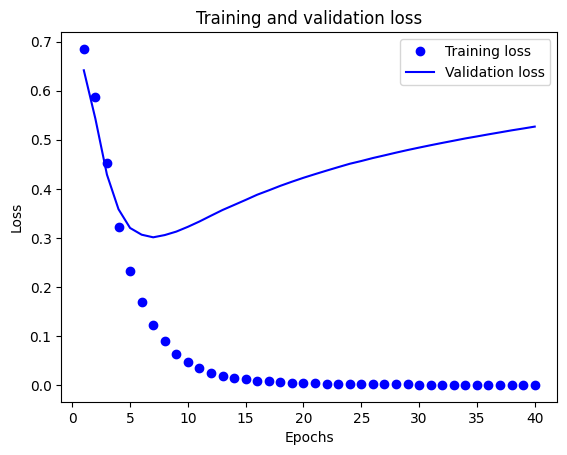

In [15]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

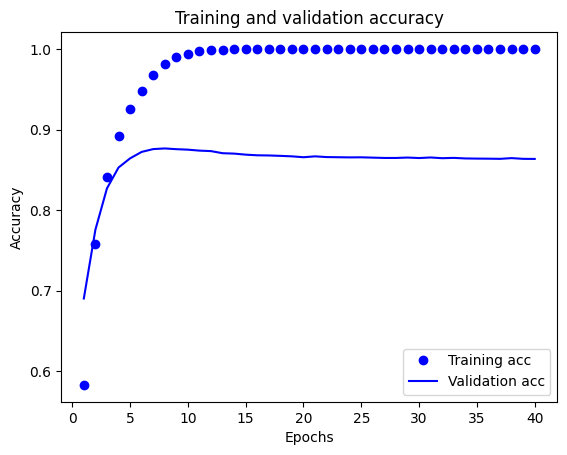

In [16]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

이 그래프에서 점선은 훈련 손실과 훈련 정확도를 나타냅니다. 실선은 검증 손실과 검증 정확도입니다.

훈련 손실은 에포크마다 *감소*하고 훈련 정확도는 *증가*한다는 것을 주목하세요. 경사 하강법 최적화를 사용할 때 볼 수 있는 현상입니다. 매 반복마다 최적화 대상의 값을 최소화합니다.

약 20개 epoch 후에 최대치에 도달하는 검증 손실 및 정확도의 경우에는 그렇지 않습니다. 이것은 과대적합의 예입니다. 즉, 모델은 이전에 입력된 적이 없는 데이터보다 훈련 데이터에서 더 우수한 성능을 나타냅니다. 이 시점 이후 모델은 테스트 데이터로 *일반화*되지 않는 훈련 데이터에 *특정한* 표현을 과도하게 최적화하고 학습합니다.

이 특별한 경우에는 단순히 약 20개 epoch 후에 훈련을 중단함으로써 과대적합을 방지할 수 있습니다. 나중에 콜백을 사용하여 이 작업을 자동으로 수행하는 방법을 살펴보겠습니다.